# <b><u> Google Play – Apps market
## - Sightseeing GG Play apps market
## - How apps get ‘high’ rating and installing 

## <b><u>Input data:</u></b>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-play-store/22. googleplaystore_user_reviews.csv
/kaggle/input/google-play-store/22 googleplaystore.csv


In [2]:
# Reading all files
raw_path = '../input/brazilian-ecommerce/'
apps = pd.read_csv('../input/google-play-store/22 googleplaystore.csv')
reviews = pd.read_csv('../input/google-play-store/22. googleplaystore_user_reviews.csv')

## <b><u>Dataset overview:</u></b>

In [3]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# List dataset
datasets = [apps,reviews]
# List dataset name
titles = ['apps','reviews']

# Creates an empty list to store findings
summary_list = []


# Implements a loop to iterate over the data frames in the lists 
# and construct a summary table for each one
for title, df in zip(titles, datasets):
    # Creates 'sumary' table with 3 columns
    summary = pd.DataFrame({'dataset':title,
                            'data_type':df.dtypes,
                            'quantity':len(df),
                           'dup_row':df.duplicated().sum(),
                           'dup_row%':df.duplicated().mean()})
    # Creates an empty list to store counts of duplicate rows and null values for each column
    # Assists in making decision for data exploring and preprocessing
    duplicated_value = []
    null_value = []
    #quantile_25=[]
    # Iterates through each column in the DataFrame
    for column in df.columns:
        # Counts the number of the duplicated and the null then appends them respectively
        # in the matching list. 
        duplicated_value.append(df.duplicated(subset=[column]).sum())
        null_value.append(df[column].isnull().sum())
        #quantile_25.append(df[column].quantile(0.25))
    # Add columns and attach value list in the 'sumary' table
    summary['dup_value'] = duplicated_value

    summary['dup_value%'] = summary['dup_value'] /len(df) *100    
    
    summary['null_value']= null_value
    
    summary['null_value%'] = summary['null_value']/len(df) *100
    
    #summary['quantile_25']=quantile_25

    # Converts the index of the summary DataFrame to a column named column and 
    # appends it to the summary_list
    summary_list.append(summary.reset_index())

# Concatenates all summary DataFrames in the summary_list vertically 
#into a single DataFrame named combined_summary.
combined_summary = pd.concat(summary_list)

combined_summary= combined_summary.rename(columns = {'index':'column'} )
combined_summary

,column,dataset,data_type,quantity,dup_row,dup_row%,dup_value,dup_value%,null_value,null_value%
0,App,apps,object,10841,483,0.044553,1181,10.893829,0,0.000000
1,Category,apps,object,10841,483,0.044553,10807,99.686376,0,0.000000
2,Rating,apps,float64,10841,483,0.044553,10800,99.621806,1474,13.596532
3,Reviews,apps,object,10841,483,0.044553,4839,44.636104,0,0.000000
4,Size,apps,object,10841,483,0.044553,10379,95.738401,0,0.000000
5,Installs,apps,object,10841,483,0.044553,10819,99.797067,0,0.000000
6,Type,apps,object,10841,483,0.044553,10837,99.963103,1,0.009224
7,Price,apps,object,10841,483,0.044553,10748,99.142146,0,0.000000
8,Content Rating,apps,object,10841,483,0.044553,10834,99.935430,1,0.009224
9,Genres,apps,object,10841,483,0.044553,10721,98.893091,0,0.000000


<ul>
    <li>This table shows the number and the proportion of the null and duplicated values in each column of dataframes. Additionally, it points out the data type of values in each column and the number of duplicated rows in each dataset.</li>
    <li>This table is conducive to penetrating dataset and intending to process data by combining the description of columns. The findings are obtained, include: 
        <ol>
            <li>Regarding 'reviews' dataframe, firstly, the number of duplicated rows has taken above a half of dataset. However, there is not any feature which is able to determine a unique record. Moreover, there are 64.295 reviews, but the number of duplicated value in 'App' is 63.221 taking above 98% of reviews, so there is just above 1 thousand apps, which are out of well above ten thousand apps in 'apps' dataset, were reviewed by users. Finally, the features of 'reviews' dataset are not useful variables to analyse. In conclusion, 'reviews' dataframe will be removed from the data of this project. 
            </li>
            <li>The data type of values in 'ContentRating','Android ver','Last Updated','Price','Installs','Size','Review' has been object and unable to measure. However, the description of columns points out these features would be adjusted to analyze model, so these values  will be converted to numeric or matching types.
            </li>
            <li>The number of duplicated rows take just under 4,5% of all records in 'apps' dataframe. In contrast, the figure for that in 'reviews' is well above a half. The duplicated rows are unable to replace and will irritate the result of analysis, so they will be removed.
            </li>
            <li>All the features in 'apps' allow for duplicated value compared to one or more values of other records, but the 'App' column is exception. The name of each app must be unique. Before removing the records containing the duplicated value in 'App' column, browsing these rows is necessary to make decision for processing. 
            </li>
            <li>The number of null values in columns almost take a mimority in the number of values in columns, the exception is 'Rating' columns. That in the 'Rating' column has been 1.474 and taken just over 13% of the column's values. The extent of null values in 'Rating' columns is large enough to affect the integrity of data. For example, if the null values in 'Rating' column are removed totally, the number of records will be lost 13%. Moreover, rating is one of the research object, which is one of the results of this project. With the feature of rating values, which are numeric values, so they will be replaced easily by the mean value of other 'Rating' values
            </li>
        </ol>
    </li>
    <li>With the above judgements about the dataset, the following will be implemented respectively to solve the issues for earning the useful dataset. 
</ul>

## <b><u>Data preprocessing:</u></b>
### 1. <u>Convert data type:</u>   
    
        
    

In [5]:
#Imports the regular expression module (re) for extracting numbers from strings.
import re

def check_special_characters_in_columns(df, columns_to_check):
    
    special_chars = {}

    # Lặp qua từng cột trong danh sách cột cần kiểm tra
    for column in columns_to_check:
        special_chars_count = 0

        # Lặp qua từng giá trị trong cột và kiểm tra ký tự đặc biệt
        for value in df[column]:
            if pd.notna(value):
                if re.search(r'[^a-zA-Z0-9\s]', str(value)):
                    special_chars_count += 1

        # Nếu có ký tự đặc biệt, thêm vào dictionary
        if special_chars_count > 0:
            special_chars[column] = special_chars_count

    return special_chars

# Sử dụng phương thức
columns_to_check = ['Content Rating','Android Ver','Last Updated','Price','Installs','Size','Reviews']  # Thay thế bằng các tên cột cần kiểm tra
special_characters_info = check_special_characters_in_columns(apps, columns_to_check)
special_characters_info

{'Content Rating': 916,
 'Android Ver': 9476,
 'Last Updated': 10841,
 'Price': 800,
 'Installs': 10839,
 'Size': 3610,
 'Reviews': 1}

All columns considered to transform data type to numeric cannot be performed transformation due to values containing special characters. 
#### <u>Reviews:</u>  
The command line was used to convert data type of 'Reviews' column annoucing incorrect with 1 string value '3.0M'. 



In [6]:
# Shows the records with 'Reviews' value equal to string'3.0M'
apps[apps['Reviews'].str.contains(r'[^a-zA-Z0-9\s]')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can realize easily that this record is dropped a feature namely 'Category', because the data from 'Rating' to the end columns were pushed forward to the left hand and it's 'Reviews' value is 'Size' value. Therefore, we will move all data from 'Category' to 'Current Ver' one step to the right hand.


In [7]:
# Moves data from 'Category' to the end columns of record 1.073rd  one step to the right hand 
apps.iloc[10472,1:] = apps.iloc[10472,1:].shift(1)

/tmp/ipykernel_18/2411644721.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  apps.iloc[10472,1:] = apps.iloc[10472,1:].shift(1)


In [8]:
# Checks record 1.073rd after shifting
apps[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,None,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


In [9]:
# Fills the matching value in 'Category' of record 10.473rd
apps.loc[apps['App']=='Life Made WI-Fi Touchscreen Photo Frame','Category']= 'LIFESTYLE'
apps.loc[apps['App']=='Life Made WI-Fi Touchscreen Photo Frame','Genres']= 'LIFESTYLE'

In [10]:
# Converts data type of 'Reviews' to numeric.
apps['Reviews']=apps['Reviews'].astype(float)

#### <u>Size:</u> 
The values of 'Size' express the weitght of apps with different units of software weight, includes K (Kilobite) and M(Megabite). The exchange rate of 1M is 1.000K. Additionally, 'Size' contains categorical value, is 'Varies with device'.<br>
To convert data type of 'Size' to numeric values, firstly, 'Varies with device' will be replaced by median of 'Size'. Afterward, Kilobite values will be converted to Megabite values, all values in 'Size' are numbers with the same unit which is Megabite. Finally, data type of 'Size' will be numerical type. 

In [11]:
# Show all unique value in 'Size'
apps['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [12]:
apps['Size']=apps['Size'].replace('Varies with device',apps['Size'].min())

In [13]:
#Imports the regular expression module (re) for extracting numbers from strings.
import re

#defines a function named convert_reviews_k2M that takes one argument, size
def convert_reviews_k2M(size):
    # checks if size is a string. If not, the function likely wouldn't work correctly, 
    # so it returns
    if isinstance(size,str):
        # Extracts the numbers from string and convert to float by a decimal point and more digits
        value=float(re.findall(r'\d+\.*\d*',size)[0])
        # Extracts the unit by the last character of string.
        unit=size[-1]
        # Selects conditions to return the right result
        if unit=='M':
          return value
        elif unit=='k':
          return value*0.001
        raise ValueError('Invalid Size Format')

In [14]:
# Creates list store the value returned
converted_sizes=[]
# Implements a loop of size in size list
for size in apps['Size'].tolist():
    # Converts size K2M
    converted_size=convert_reviews_k2M(size)
    # Appends value in list converted size
    converted_sizes.append(converted_size)
# Add column 'size_mb' into 'apps' dataframe
apps['size_mb'] = pd.DataFrame({'size_mb': converted_sizes})

#### <u>Installs & Price:</u> 
The values of 'Install' and 'Price' have the uniforms of units. It just contains some special characters for the expression of unit and number, such as "+",",","$" 

To convert them to numeric type, these special characters must be removed. 


In [15]:
apps['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [16]:
apps['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# List columns name
cols=['Installs','Price']
# List special characters
signs=['+',',','$']

# Interates columns name
for col in cols:
    # Interates special characters
    for sign in signs:    
        # Inserts column name in dataframe name. In each column has special character, 
        # each row is interated, is represented by x. Then implements deleting special
        # character figured out. 
        apps[col]=apps[col].apply(lambda x:x.replace(sign,""))

In [18]:
# Converts data type of columns to float
apps['Installs']=apps['Installs'].astype(float)
apps['Price']=apps['Price'].astype(float)

#### <u>Last Updated:</u> 
The value type of 'Last Updated' is datetime data, but it is formatted in a different form.

To optimize measurable attribute of this column, it's value will be converted to numeric type.

In [19]:
apps['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [20]:
# Determines date form of value for system
apps['Last Updated'] = pd.to_datetime(apps['Last Updated'], format='%B %d, %Y')

In [21]:
apps['Last_Updated']=apps['Last Updated']

In [22]:
# Extracts the most recent date and print out
current_date = apps['Last Updated'].max()
print(f"The last date:{(current_date)}")

# Assigns the length of dataset for a variable
length = len(apps)

# Interates each element in dataset
for i in range(length):
    # At the row 'i', minus 'Last Updated' for current date to obtain 
    # the recent updated duration by day number
    apps.loc[i,'Last_Updated']= (current_date - apps.loc[i,'Last Updated']).days

# Converts "Last Updated" data type to integer
apps["Last_Updated"]=apps["Last_Updated"].astype(int)

The last date:2018-08-08 00:00:00


/tmp/ipykernel_18/2869607080.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '213' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  apps.loc[i,'Last_Updated']= (current_date - apps.loc[i,'Last Updated']).days


#### <u>Content Rating:</u> 
This column seperate dataset according age limitation, which would be seen that ordinal data, completely expressed by number. 

There are two apps which are unrated,are belong to category Family and Tools. They will be rated as Everyone.

Content rating values will be converted to number to express the age limit ascending. <ul>
<li>1 = 'Everyone'
<li>2 = 'Everyon 10+'
<li>3 = 'Teen'
<li>4 = 'Mature 17+'
<li>5 = 'Adults only 18+'

In [23]:
apps['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [24]:
apps[apps['Content Rating']=='Unrated']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated
7312,Best CG Photography,FAMILY,NaN,1.0,2.5M,500.0,Free,0.0,Unrated,Entertainment,2015-06-24,5.2,3.0 and up,2.5,1141
8266,DC Universe Online Map,TOOLS,4.1,1186.0,6.4M,50000.0,Free,0.0,Unrated,Tools,2012-02-27,1.3,2.3.3 and up,6.4,2354


In [25]:
# Implements a loop integrate the value of 'Content Rating' at i and add matching rank in 'content_rating'
for i in range(len(apps)):
    if apps.loc[i,'Content Rating']== 'Adults only 18+':
        apps.loc[i,'content_rating'] = 5;
    if apps.loc[i,'Content Rating']== 'Mature 17+':
        apps.loc[i,'content_rating'] = 4;
    if apps.loc[i,'Content Rating']== 'Teen':
        apps.loc[i,'content_rating'] = 3;
    if apps.loc[i,'Content Rating']== 'Everyone 10+':
        apps.loc[i,'content_rating'] = 2;
    if apps.loc[i,'Content Rating']== 'Unrated' or apps.loc[i,'Content Rating']== 'Everyone':
        apps.loc[i,'content_rating'] = 1;

#### <u>Android Ver:</u> 
This column describes requirement of operational system (os). Almost values give information about the minimal criteron of os on device. However, there are values such as 'Varies with device' and 'NaN', it means these apps are able adapt with multi os, so 'Android Ver' value of these apps will be replaced by the value of the apps having the min difference of updated timestampt.

In [26]:
apps['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [27]:
apps[apps['Android Ver']=='Varies with device'].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221.0,1.0M,10000000.0,Free,0.0,Everyone,Art & Design,2018-07-30,Varies with device,Varies with device,1.0,9,1.0
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057.0,1.0M,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,1.0,9,1.0
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211.0,1.0M,5000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-07-30,Varies with device,Varies with device,1.0,9,1.0
68,REPUVE,AUTO_AND_VEHICLES,3.9,356.0,1.0M,100000.0,Free,0.0,Everyone,Auto & Vehicles,2018-05-25,Varies with device,Varies with device,1.0,75,1.0
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777.0,1.0M,1000000.0,Free,0.0,Everyone,Auto & Vehicles,2018-08-04,Varies with device,Varies with device,1.0,4,1.0


In [28]:
apps[apps['Android Ver'].isna()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230.0,11M,1000.0,Paid,1.49,Everyone,Personalization,2018-07-20,4.4,NaN,11.0,19,1.0
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189.0,2.1M,10000.0,Free,0.00,Everyone,Personalization,2018-03-27,1.1,NaN,2.1,134,1.0


In [29]:
# Split the string by a space as a delimiter and reach the first string the add in 'os_require'
apps['os_require']= apps['Android Ver'].str.split(' ').str[0]

In [30]:
# Create a copy of the column 'os_require' to store the replacement results.
os_require_copy = apps['os_require'].copy()

# Tìm các dòng có giá trị NaN hoặc 'Varies' trong cột 'os_require'
mask = apps['os_require'].isna() | (apps['os_require'] == 'Varies')

# Find the rows with NaN or 'Varies' values in the column 'os_require'.
for i, row in apps[mask].iterrows():
    diff = abs(apps.loc[i, 'Last Updated'] - apps['Last Updated'])
    nearest_index = diff.idxmin()  # Tìm chỉ mục của giá trị có khoảng cách nhỏ nhất
    os_require_copy[i] = apps.loc[nearest_index, 'os_require']

# Update the column 'os_require' with the replacement results.
apps['os_require'] = os_require_copy


        

In [31]:
# Replaces '4.4W' by '4.5'
apps['os_require']=apps['os_require'].replace('4.4W','4.5')

In [32]:
apps['os_require'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '2.2',
       'Varies', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '4.5', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

In [33]:
# Creates a copy of the column 'os_require' to store the replacement results.
os_require_copy = apps['os_require'].copy()

# Finds the rows with NaN or 'Varies' values in the column 'os_require'
mask = apps['os_require'].isna() | (apps['os_require'] == 'Varies')


for i, row in apps[mask].iterrows():
    if apps.loc[i, 'os_require'] == 'Varies':
        next
    else: 
        diff = abs(apps.loc[i, 'Last Updated'] - apps['Last Updated'])
        nearest_index = diff.idxmin()  # Finds the index of the value with the smallest distance.
        os_require_copy[i] = apps.loc[nearest_index, 'os_require']

# Updates the column 'os_require' with the replacement results
apps['os_require'] = os_require_copy

In [34]:
apps['os_require'].unique()

array(['4.0.3', '4.2', '4.4', '2.3', '3.0', '4.1', '4.0', '2.3.3', '2.2',
       'Varies', '5.0', '6.0', '1.6', '1.5', '2.1', '7.0', '5.1', '4.3',
       '2.0', '3.2', '4.5', '7.1', '8.0', '3.1', '2.0.1', '1.0'],
      dtype=object)

In [35]:
for index, row in apps.iterrows():
    # Check if the value in the 'os_require' column is 'Varies'
    if row['os_require'] == 'Varies':
        # Gets the update date
        update_date = pd.to_datetime(row['Last Updated'])
        # Gets data with the same update month or year
        matching_data = apps[(pd.to_datetime(apps['Last Updated']).dt.year == update_date.year) | (pd.to_datetime(apps['Last Updated']).dt.month == update_date.month)]
        # Gets the 'Android Ver' value of the first matching row (excluding the current row)
        matching_value = matching_data[matching_data.index != index]['os_require'].iloc[0]
        # Replaces the 'Varies' value with the corresponding value
        apps.loc[index, 'os_require'] = matching_value

In [36]:
# Sort unique versions in ascending order
sorted_versions = sorted(apps['os_require'].unique(), key=lambda x: tuple(map(int, x.split('.'))))
# Create a mapping dictionary where each version is mapped to a unique integer
mapping = dict(zip(sorted_versions, range(1, len(sorted_versions) + 1)))
# Replace version strings with their corresponding mapped integer values
apps['os_require'] = apps['os_require'].replace(mapping)

/tmp/ipykernel_18/3959507519.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  apps['os_require'] = apps['os_require'].replace(mapping)


In [37]:
# Checks
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating,os_require
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19.0,213,1.0,14
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14.0,205,1.0,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,8.7,7,1.0,14
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,25.0,61,3.0,16
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2.8,49,1.0,18


In [38]:
# Checks
apps.describe()

,Reviews,Installs,Price,Last Updated,size_mb,Last_Updated,content_rating,os_require
count,1.084100e+04,1.084100e+04,10841.000000,10841,10841.000000,10841.000000,10841.000000,10841.000000
mean,4.441119e+05,1.546291e+07,1.027273,2017-11-21 06:53:53.723825920,18.307044,259.712573,1.400240,14.010792
min,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.008500,0.000000,1.000000,1.000000
25%,3.800000e+01,1.000000e+03,0.000000,2017-09-20 00:00:00,2.600000,19.000000,1.000000,13.000000
50%,2.094000e+03,1.000000e+05,0.000000,2018-05-24 00:00:00,9.200000,76.000000,1.000000,14.000000
75%,5.476800e+04,5.000000e+06,0.000000,2018-07-20 00:00:00,26.000000,322.000000,1.000000,15.000000
max,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,100.000000,3001.000000,5.000000,25.000000
std,2.927629e+06,8.502557e+07,15.948971,NaN,22.044665,394.593568,0.861666,3.634675


In [39]:
# Transforms type of 'Rating' to float for statistics
apps['Rating']=apps['Rating'].astype(float)

In [40]:
# Checks
apps.describe()

,Rating,Reviews,Installs,Price,Last Updated,size_mb,Last_Updated,content_rating,os_require
count,9367.000000,1.084100e+04,1.084100e+04,10841.000000,10841,10841.000000,10841.000000,10841.000000,10841.000000
mean,4.191513,4.441119e+05,1.546291e+07,1.027273,2017-11-21 06:53:53.723825920,18.307044,259.712573,1.400240,14.010792
min,1.000000,0.000000e+00,0.000000e+00,0.000000,2010-05-21 00:00:00,0.008500,0.000000,1.000000,1.000000
25%,4.000000,3.800000e+01,1.000000e+03,0.000000,2017-09-20 00:00:00,2.600000,19.000000,1.000000,13.000000
50%,4.300000,2.094000e+03,1.000000e+05,0.000000,2018-05-24 00:00:00,9.200000,76.000000,1.000000,14.000000
75%,4.500000,5.476800e+04,5.000000e+06,0.000000,2018-07-20 00:00:00,26.000000,322.000000,1.000000,15.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,2018-08-08 00:00:00,100.000000,3001.000000,5.000000,25.000000
std,0.515735,2.927629e+06,8.502557e+07,15.948971,NaN,22.044665,394.593568,0.861666,3.634675


### 2. <u>Process duplicated values:</u> 

In [41]:
# Clears duplicated rows in apps dataframe
apps=apps.drop_duplicates()

In [42]:
# Shows samples of duplicated in name
apps[apps['App'].duplicated()].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating,os_require
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804.0,1.0M,5.000000e+06,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,1.0,163,1.0,14
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859.0,35M,1.000000e+08,Free,0.0,Everyone,Business,2018-08-02,9.7.14188,4.1 and up,35.0,6,1.0,15
294,Slack,BUSINESS,4.4,51510.0,1.0M,5.000000e+06,Free,0.0,Everyone,Business,2018-08-02,Varies with device,Varies with device,1.0,6,1.0,18
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,1.0M,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device,1.0,7,1.0,14
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11M,5.000000e+08,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,11.0,61,1.0,13


In [43]:
apps[apps['App']=='Quick PDF Scanner + OCR FREE']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating,os_require
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805.0,1.0M,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,1.0,163,1.0,14
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804.0,1.0M,5000000.0,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,1.0,163,1.0,14


In [44]:
apps[apps['App']=='imo free video calls and chat']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating,os_require
347,imo free video calls and chat,COMMUNICATION,4.3,4785892.0,11M,500000000.0,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,11.0,61,1.0,13
383,imo free video calls and chat,COMMUNICATION,4.3,4785988.0,11M,500000000.0,Free,0.0,Everyone,Communication,2018-06-08,9.8.000000010501,4.0 and up,11.0,61,1.0,13


In [45]:
apps = apps.sort_values(by='Reviews', ascending=False).drop_duplicates(subset='App')

### 3. <b><u>Process missing values:</u></b>
 <b><u>Rating:</u> </b>

In [46]:
apps[apps['Rating'].isnull()==True].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating,os_require
3589,We learn children's verses in kindergarten,PARENTING,NaN,3248.0,6.5M,100000.0,Free,0.0,Everyone,Parenting;Education,2017-12-20,2.1,4.0 and up,6.5,231,1.0,13
9567,Adivina el Emoji,GAME,NaN,2536.0,32M,100000.0,Free,0.0,Everyone,Trivia,2016-10-02,1,4.0.3 and up,32.0,675,1.0,14
1559,Young Speeches,LIBRARIES_AND_DEMO,NaN,2221.0,2.4M,500000.0,Free,0.0,Everyone,Libraries & Demo,2017-01-08,1.1,2.3 and up,2.4,577,1.0,8
321,【Ranobbe complete free】 Novelba - Free app tha...,COMICS,NaN,1330.0,22M,50000.0,Free,0.0,Everyone,Comics,2018-07-03,6.1.1,4.2 and up,22.0,36,1.0,16
9612,Em Fuga Brasil,FAMILY,NaN,1317.0,60M,100000.0,Free,0.0,Everyone,Simulation,2018-04-22,1,4.1 and up,60.0,108,1.0,15


In [47]:
# Fills all missing values (nan) by the median value.
apps['Rating']=apps['Rating'].fillna(apps['Rating'].median())
x=apps['Rating'].median()
print(f"Median of 'Rating' columns is {x}")

Median of 'Rating' columns is 4.3


<b><u>Type:</u> </b>

In [48]:
# Checks missing value in 'Type' column
apps[apps['Type'].isna()==True].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,size_mb,Last_Updated,content_rating,os_require
9148,Command & Conquer: Rivals,FAMILY,4.3,0.0,1.0M,0.0,NaN,0.0,Everyone 10+,Strategy,2018-06-28,Varies with device,Varies with device,1.0,41,2.0,14


In [49]:
# Fills missing value by Free because it's price is 0.0.
apps['Type']=apps['Type'].fillna('Free')

### <b><u>Result:</u></b>
The conversion of numerical considerable columns facilitate for next analysis.

Now, we are having 5 categorical columns, 8 numerical columns and 1 datetime column. However, 'App' and 'Current Ver' are unique values of records which is usefulless to statistical analysis, and must be deleted out of categorical columns. The ones have the same datatype will be grouped for group analysis

In [50]:
# Creates column groups with the same datatype
categorical_columns = apps.select_dtypes(exclude=['number', 'datetime']).columns
numerical_columns = apps.select_dtypes(include='number').columns
date_columns = apps.select_dtypes(include='datetime').columns

# Checks results
print(categorical_columns,numerical_columns,date_columns)

Index(['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres',
       'Current Ver', 'Android Ver'],
      dtype='object') Index(['Rating', 'Reviews', 'Installs', 'Price', 'size_mb', 'Last_Updated',
       'content_rating', 'os_require'],
      dtype='object') Index(['Last Updated'], dtype='object')


In [51]:
# Removes 'Size','Content Rating','Android Ver', which are columns converted to numeric datatype.
categorical_columns= categorical_columns.drop(['Size','Content Rating','Android Ver'])

# Remove 'App' and 'Current Ver' 
categorical_columns= categorical_columns.drop(['App','Current Ver'])



In [52]:
categorical_columns

Index(['Category', 'Type', 'Genres'], dtype='object')

## <b><u>Sightseeing Google Play app market:</u> Exploratory Data Analysis (EDA)</b>
Building charts visualizes the figures of object followed categorical features, it assists identify the vital feature affect to research object.
Research objects include 'Installs' how many installing turn has been implemented, 'Rating' how users favor this app, and how many apps followed each feature.



In [53]:
# Imports libraries to visualize statistical date
import matplotlib.pyplot as plt
import seaborn as sns
import math

### <b><u>1. Datetime feature</u></b>


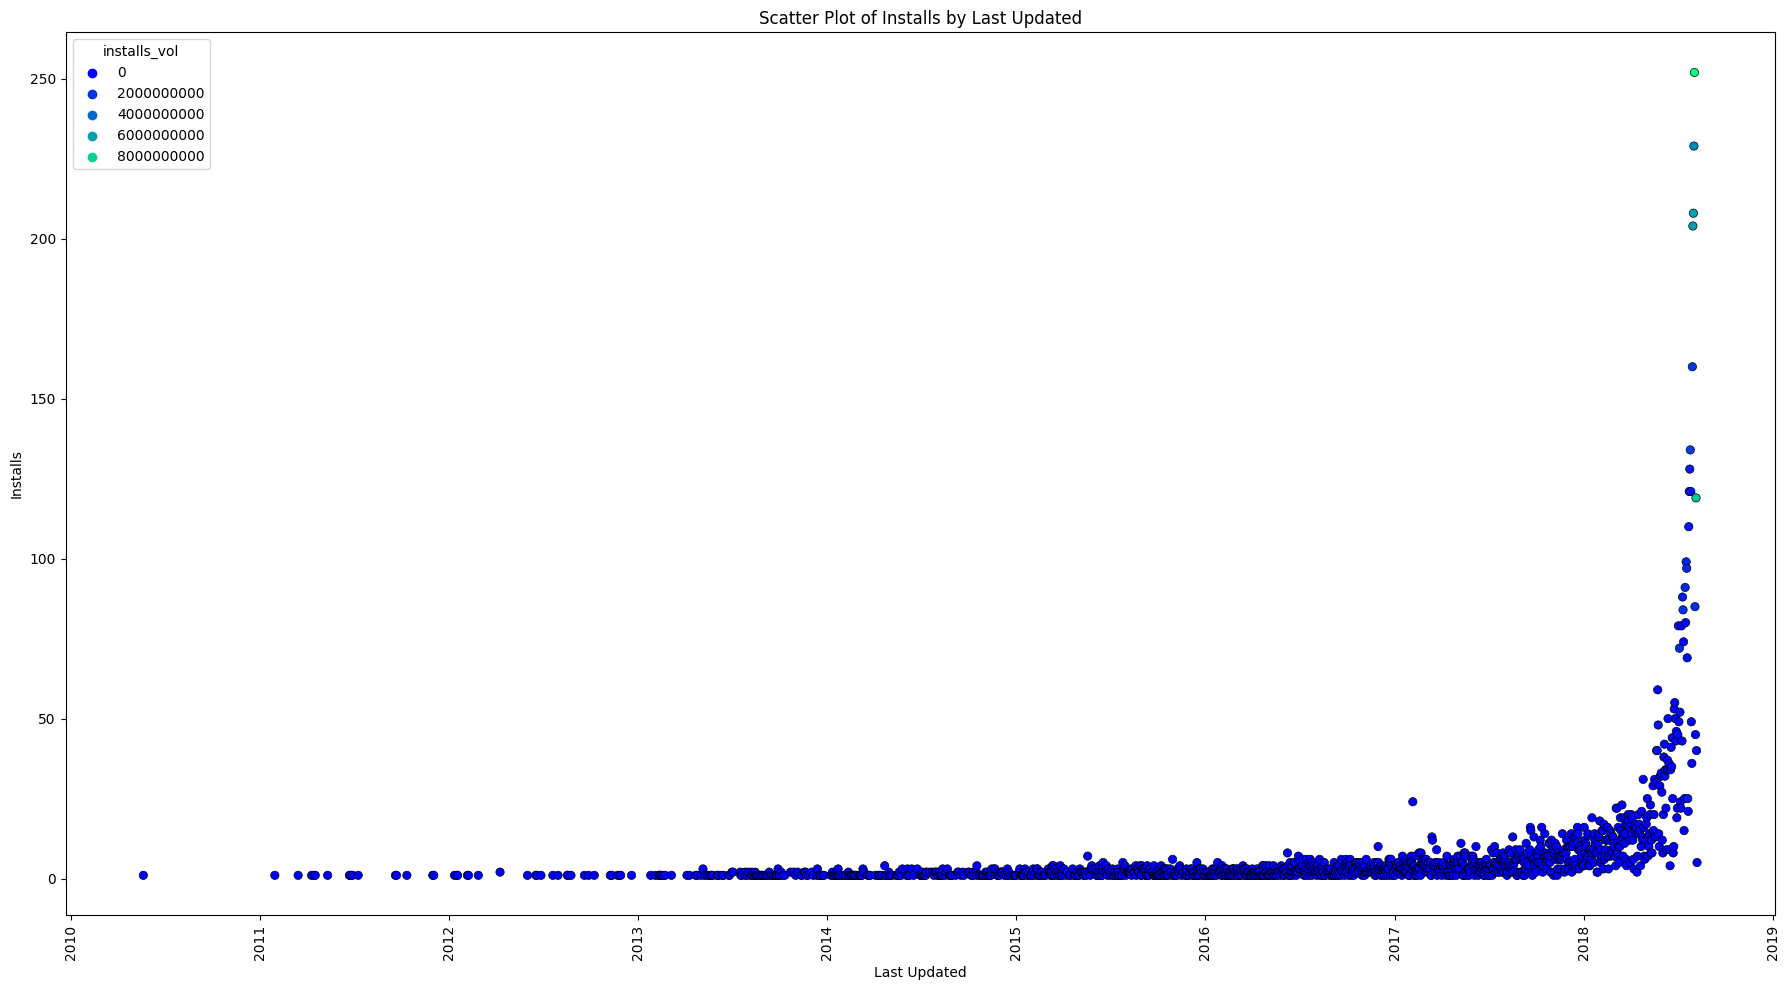

In [54]:
plt.figure(figsize=(18, 10))

# Nhóm dữ liệu theo ngày cập nhật và tính tổng số lượt tải (installs_vol) và số lượng ứng dụng (apps_vol)
groupby_date = apps.groupby(['Last Updated'], as_index=False).agg(installs_vol=('Installs', 'sum'),
                                                                  apps_vol=('Installs', 'count'))

# Vẽ biểu đồ scatter với độ to nhỏ và màu sắc của chấm dựa trên số lượng ứng dụng
sns.scatterplot(x='Last Updated', y='apps_vol', hue='installs_vol', data=groupby_date, palette='winter', edgecolor='black')

plt.xlabel('Last Updated')
plt.ylabel('Installs')
plt.title('Scatter Plot of Installs by Last Updated')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This scatter chart gives many significant information about the update of apps. Begining with the number of apps which were updated frequently in the recent time, show the great deal of apps. 

Additionally, it is not doubt that apps were earned the most frequent and recent  update, have been recieve the impressed numbers of installing.

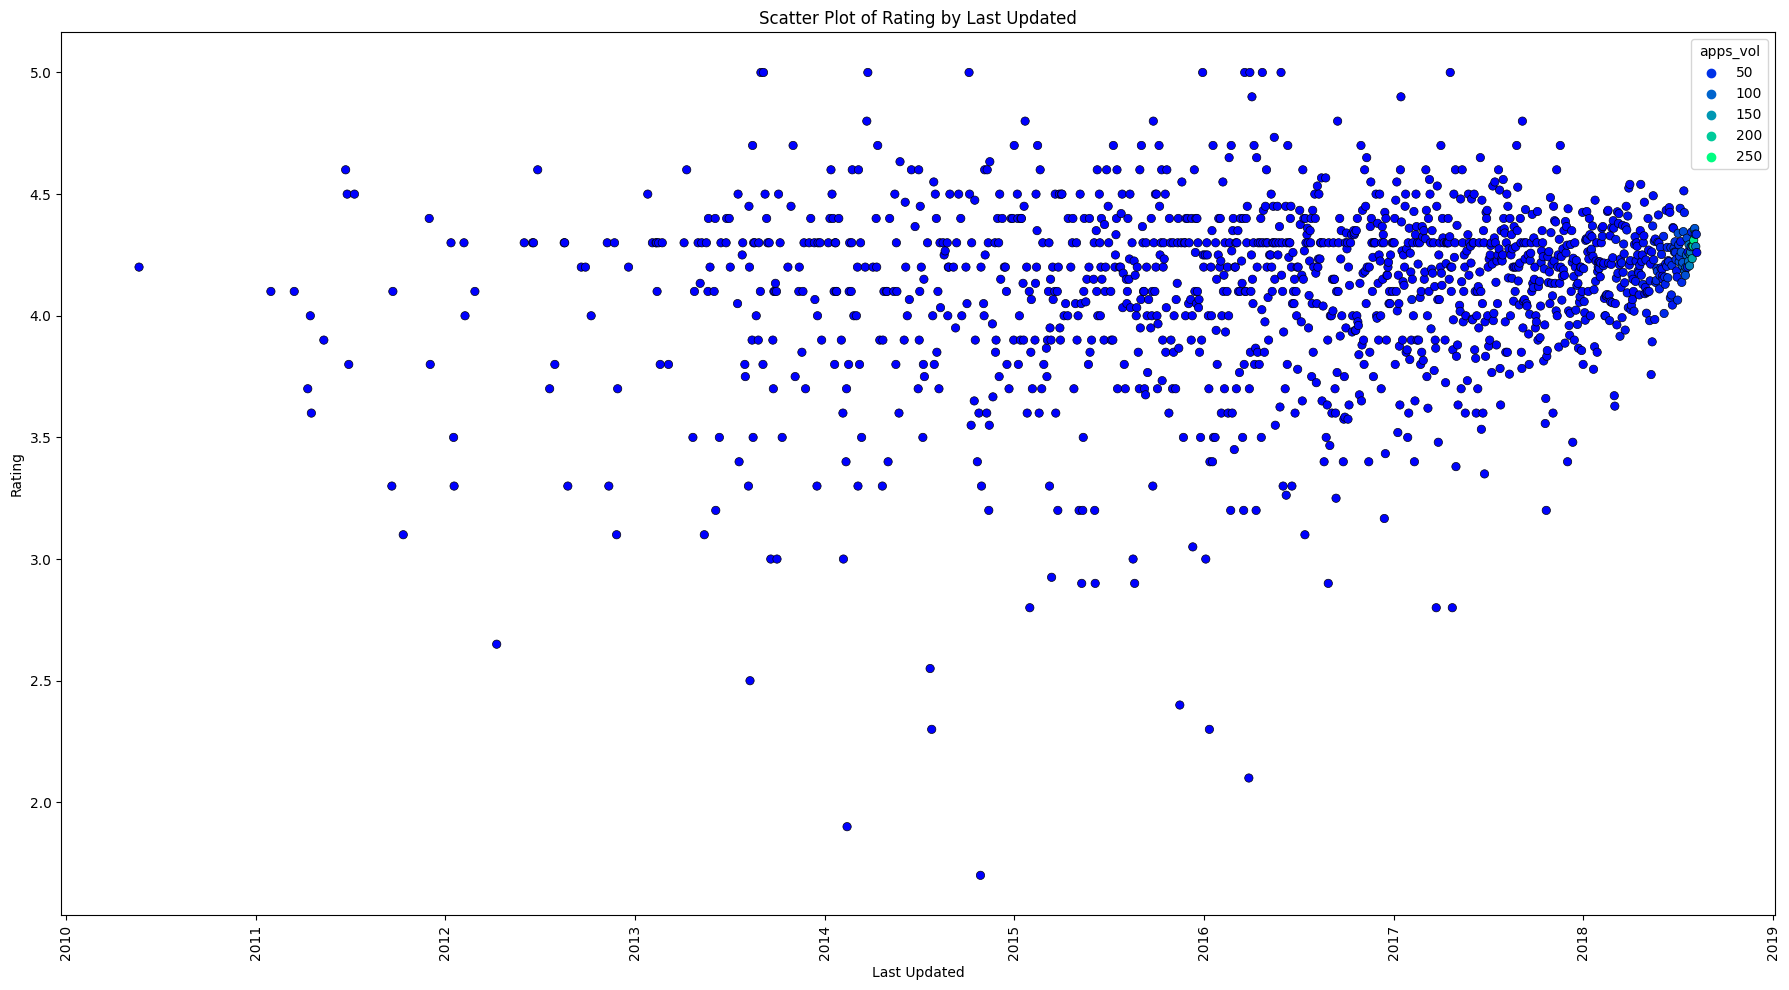

In [55]:
plt.figure(figsize=(18, 10))

# Nhóm dữ liệu theo ngày cập nhật và tính tổng số lượt tải (installs_vol) và số lượng ứng dụng (apps_vol)
groupby_date = apps.groupby(['Last Updated'], as_index=False).agg(installs_vol=('Installs', 'sum'),
                                                                  apps_vol=('Installs', 'count'), rating_mean=('Rating','mean'))

# Vẽ biểu đồ scatter với độ to nhỏ và màu sắc của chấm dựa trên số lượng ứng dụng
sns.scatterplot(x='Last Updated', y='rating_mean', hue='apps_vol', data=groupby_date, palette='winter', edgecolor='black')

plt.xlabel('Last Updated')
plt.ylabel('Rating')
plt.title('Scatter Plot of Rating by Last Updated')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

This scatter chart expresses that many apps tend to be updated recently. The actual average rating score of the most apps is from 4,0 to 4,5. 

The number of apps which have the score medium to low and top is scare. However, the cluster of scatters concerntrate on the top right, it means that the recent update timing has a positive correlation effect on rating scores.

In conclusion, apps want to get the popularity, need be updated frequently and recently.

### <b><u>2. Categorical feature</u></b>
Categorical features just are able to classification, assist to selection so their analysis is done at observation to gain the dominant of each class. 
In addition, it help conclude the effect of categorical features on Rating and Installing.
Object1 : Rating score (y1)
Object2 : Installing volume (y2)
### <b><u> App volume</u></b>

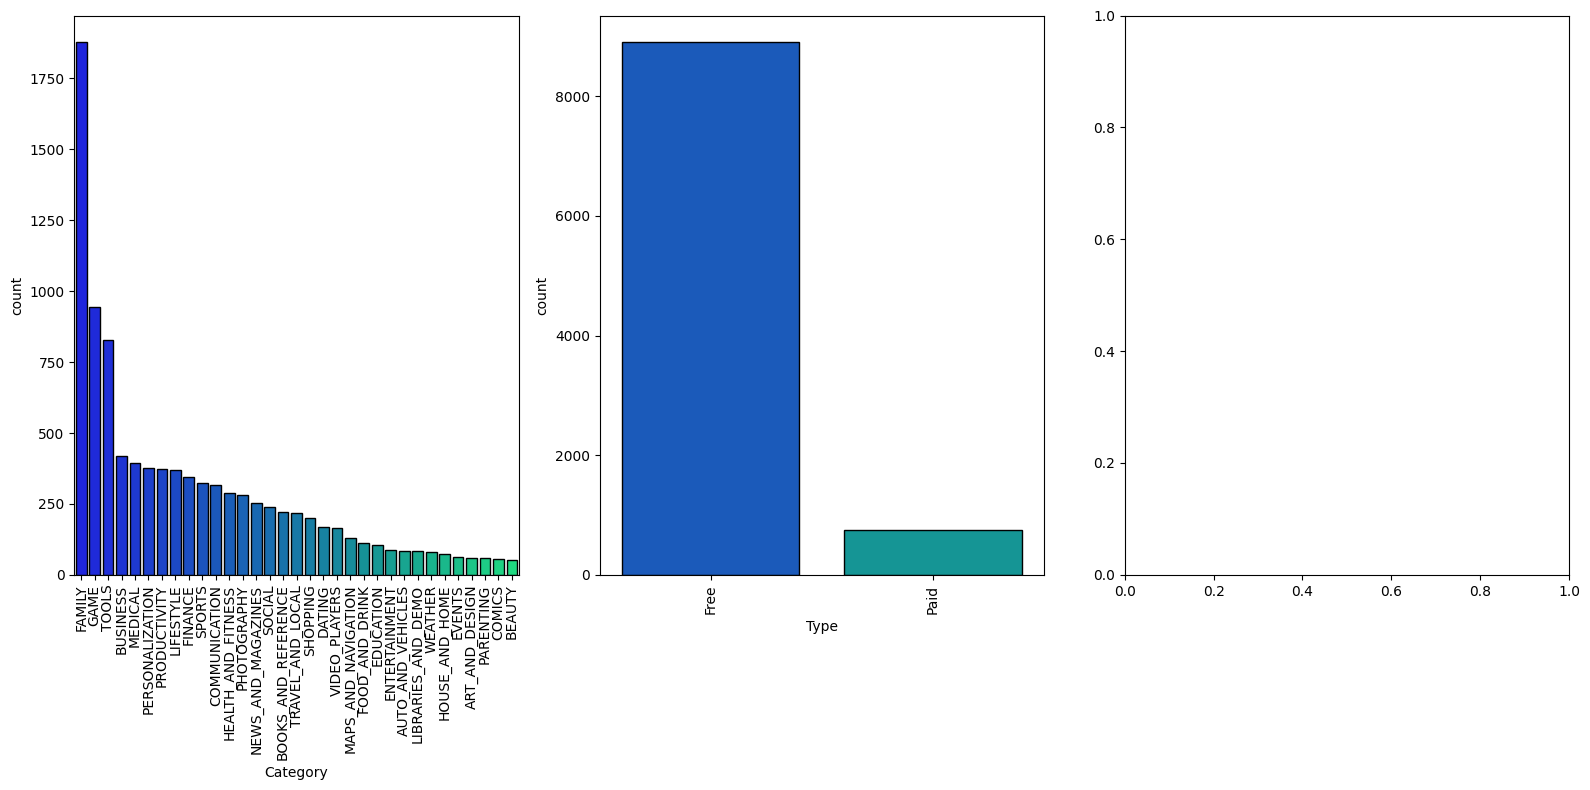

In [56]:
figuresize = (16, 8)
cols = 3
rows = math.ceil(len(categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(categorical_columns) ):
    plt.subplot(rows, cols, i)
    sns.countplot(x=categorical_columns[i-1], data=apps, palette='winter', edgecolor='black', order=apps[categorical_columns[i-1]].value_counts().index)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

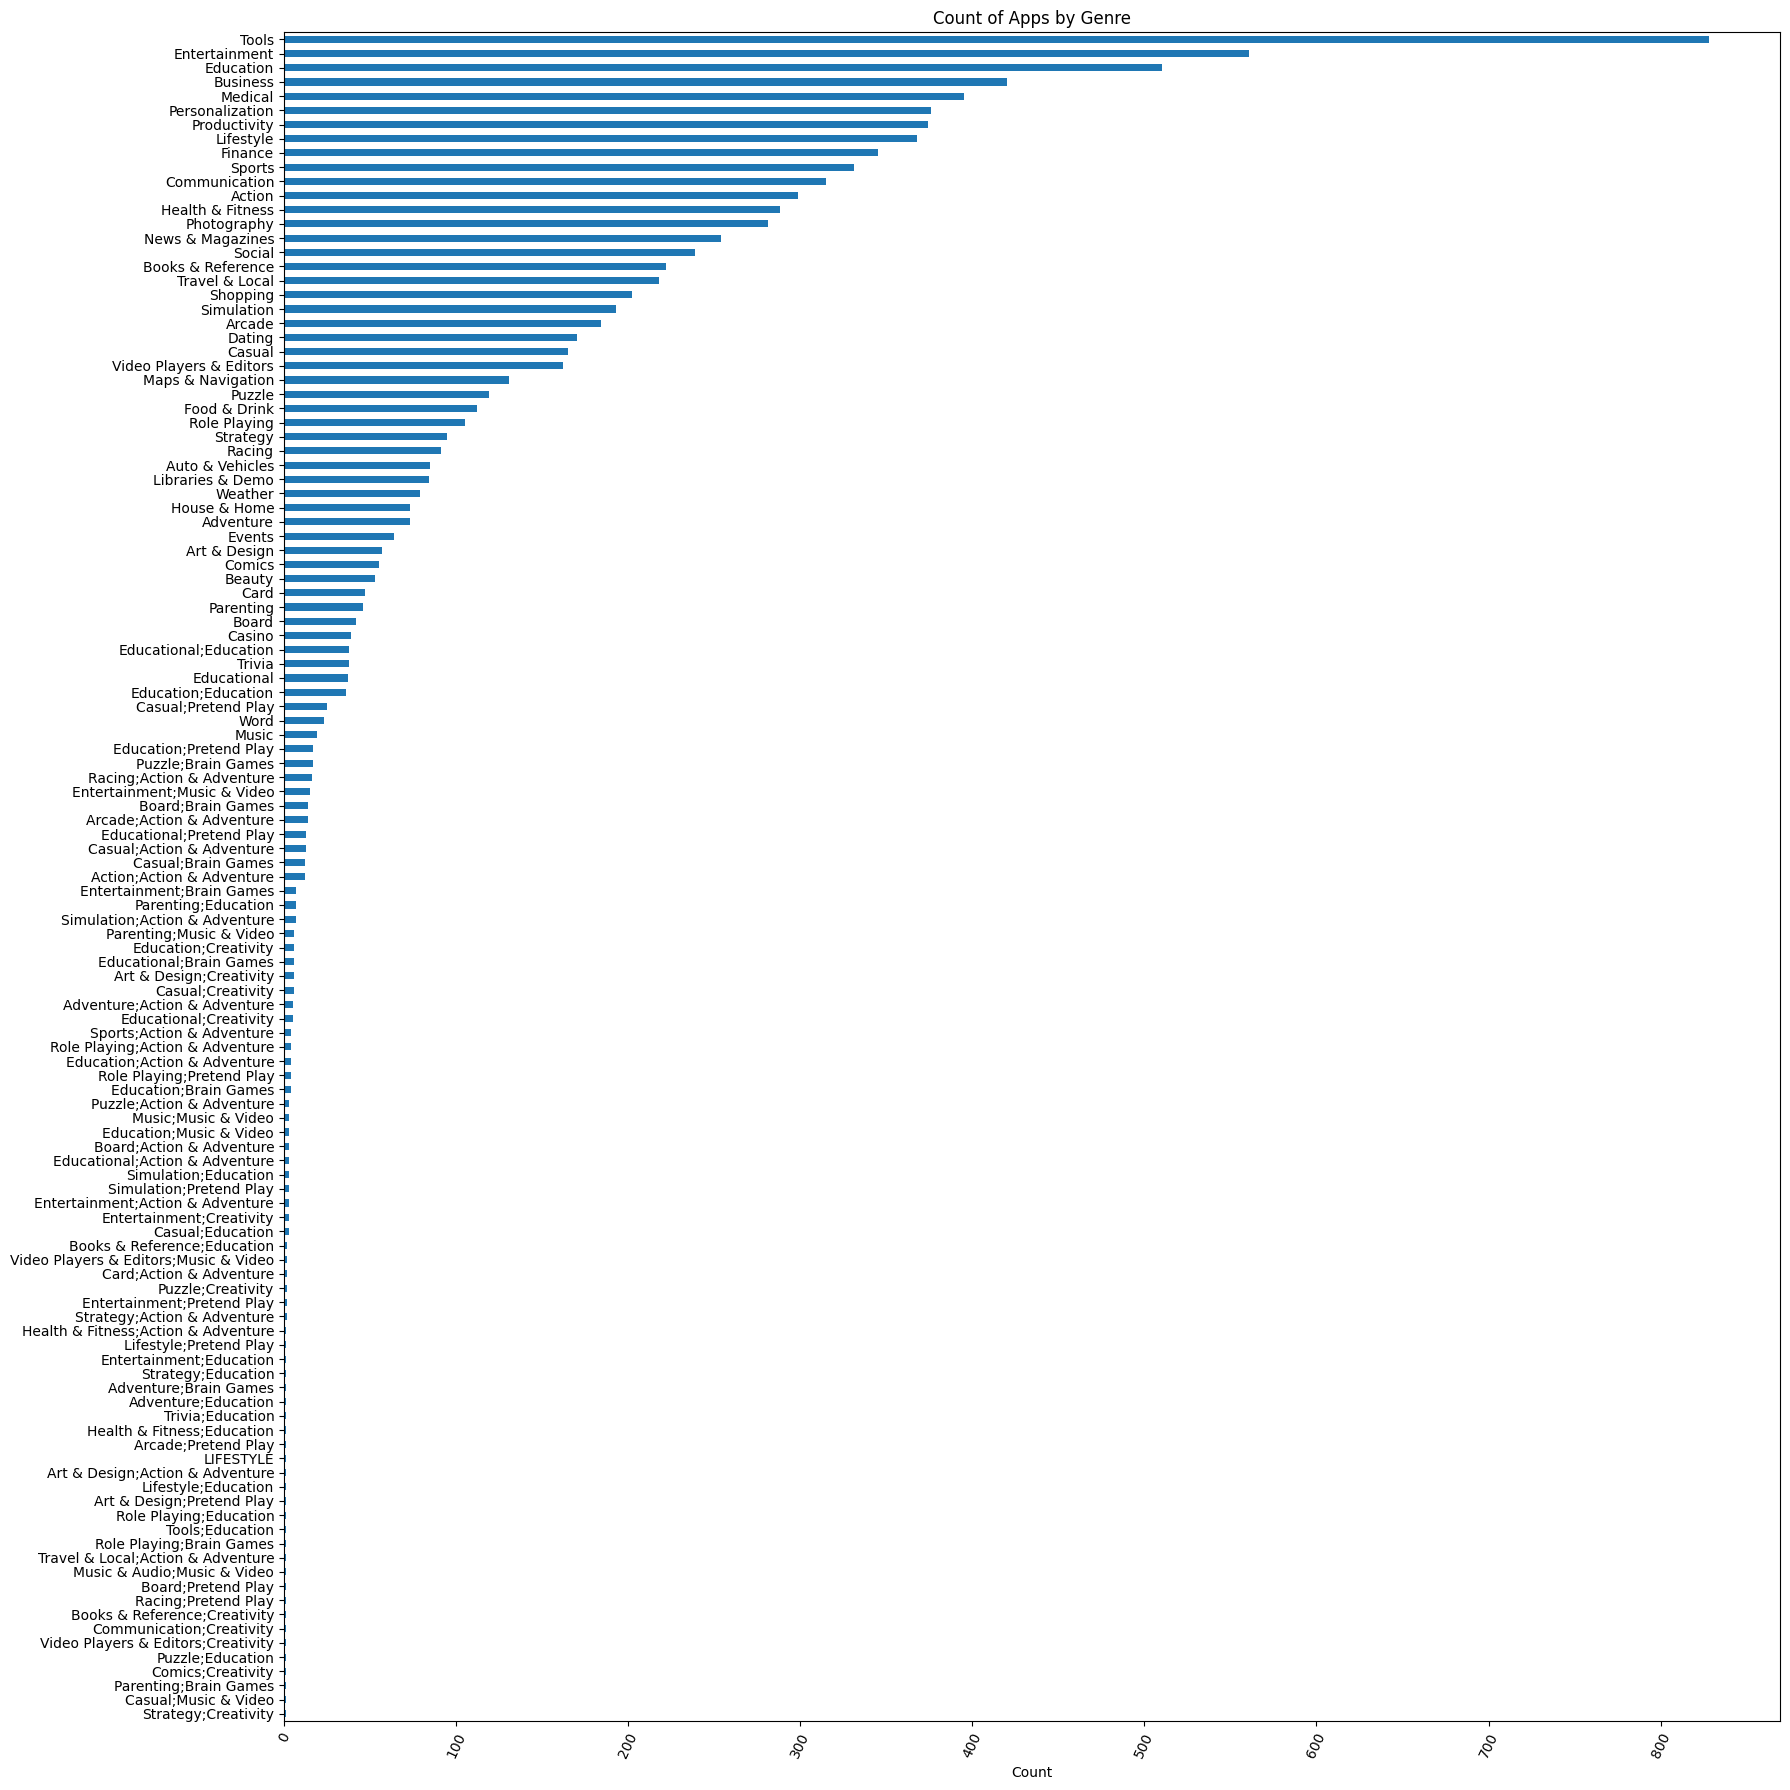

In [57]:
plt.figure(figsize=(18, 18))
apps.groupby('Genres')["Installs"].count().sort_values().plot(kind="barh",)
plt.xticks(rotation=65)
plt.xlabel('Count')
plt.ylabel('')
plt.title('Count of Apps by Genre')
plt.tight_layout()
plt.show()

These histograms give information about which Genres and Category take the lead in the number of app. Additionally, they show that the number of paid apps is just one of ten of that in free apps.

### <b><u> Install volume</u></b>

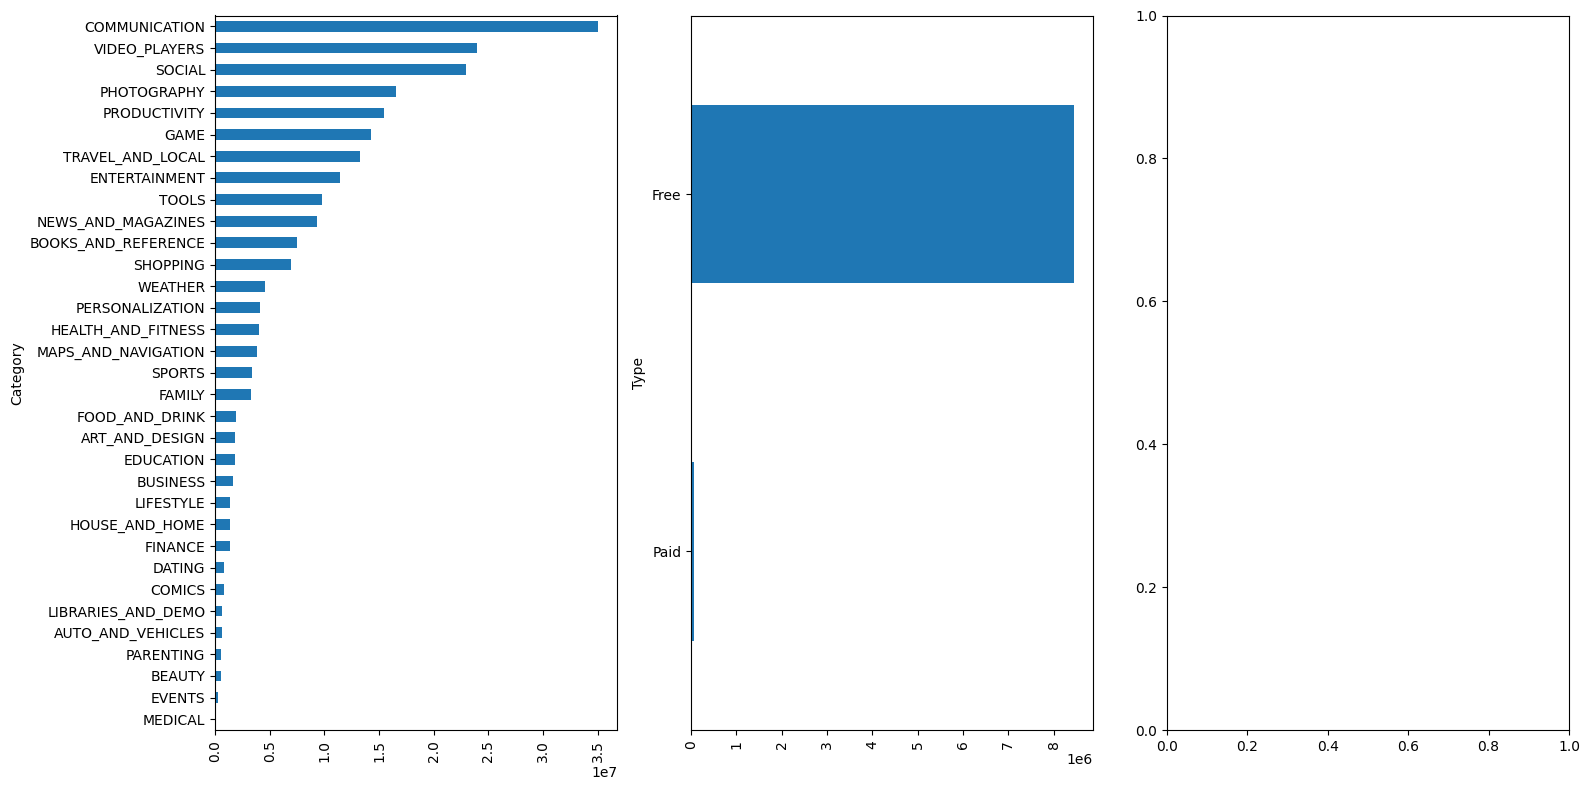

In [58]:
figuresize = (16, 8)
cols = 3
rows = math.ceil(len(categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(categorical_columns)):
    plt.subplot(rows, cols, i)
    apps.groupby(categorical_columns[i-1])["Installs"].mean().sort_values().plot(kind="barh")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

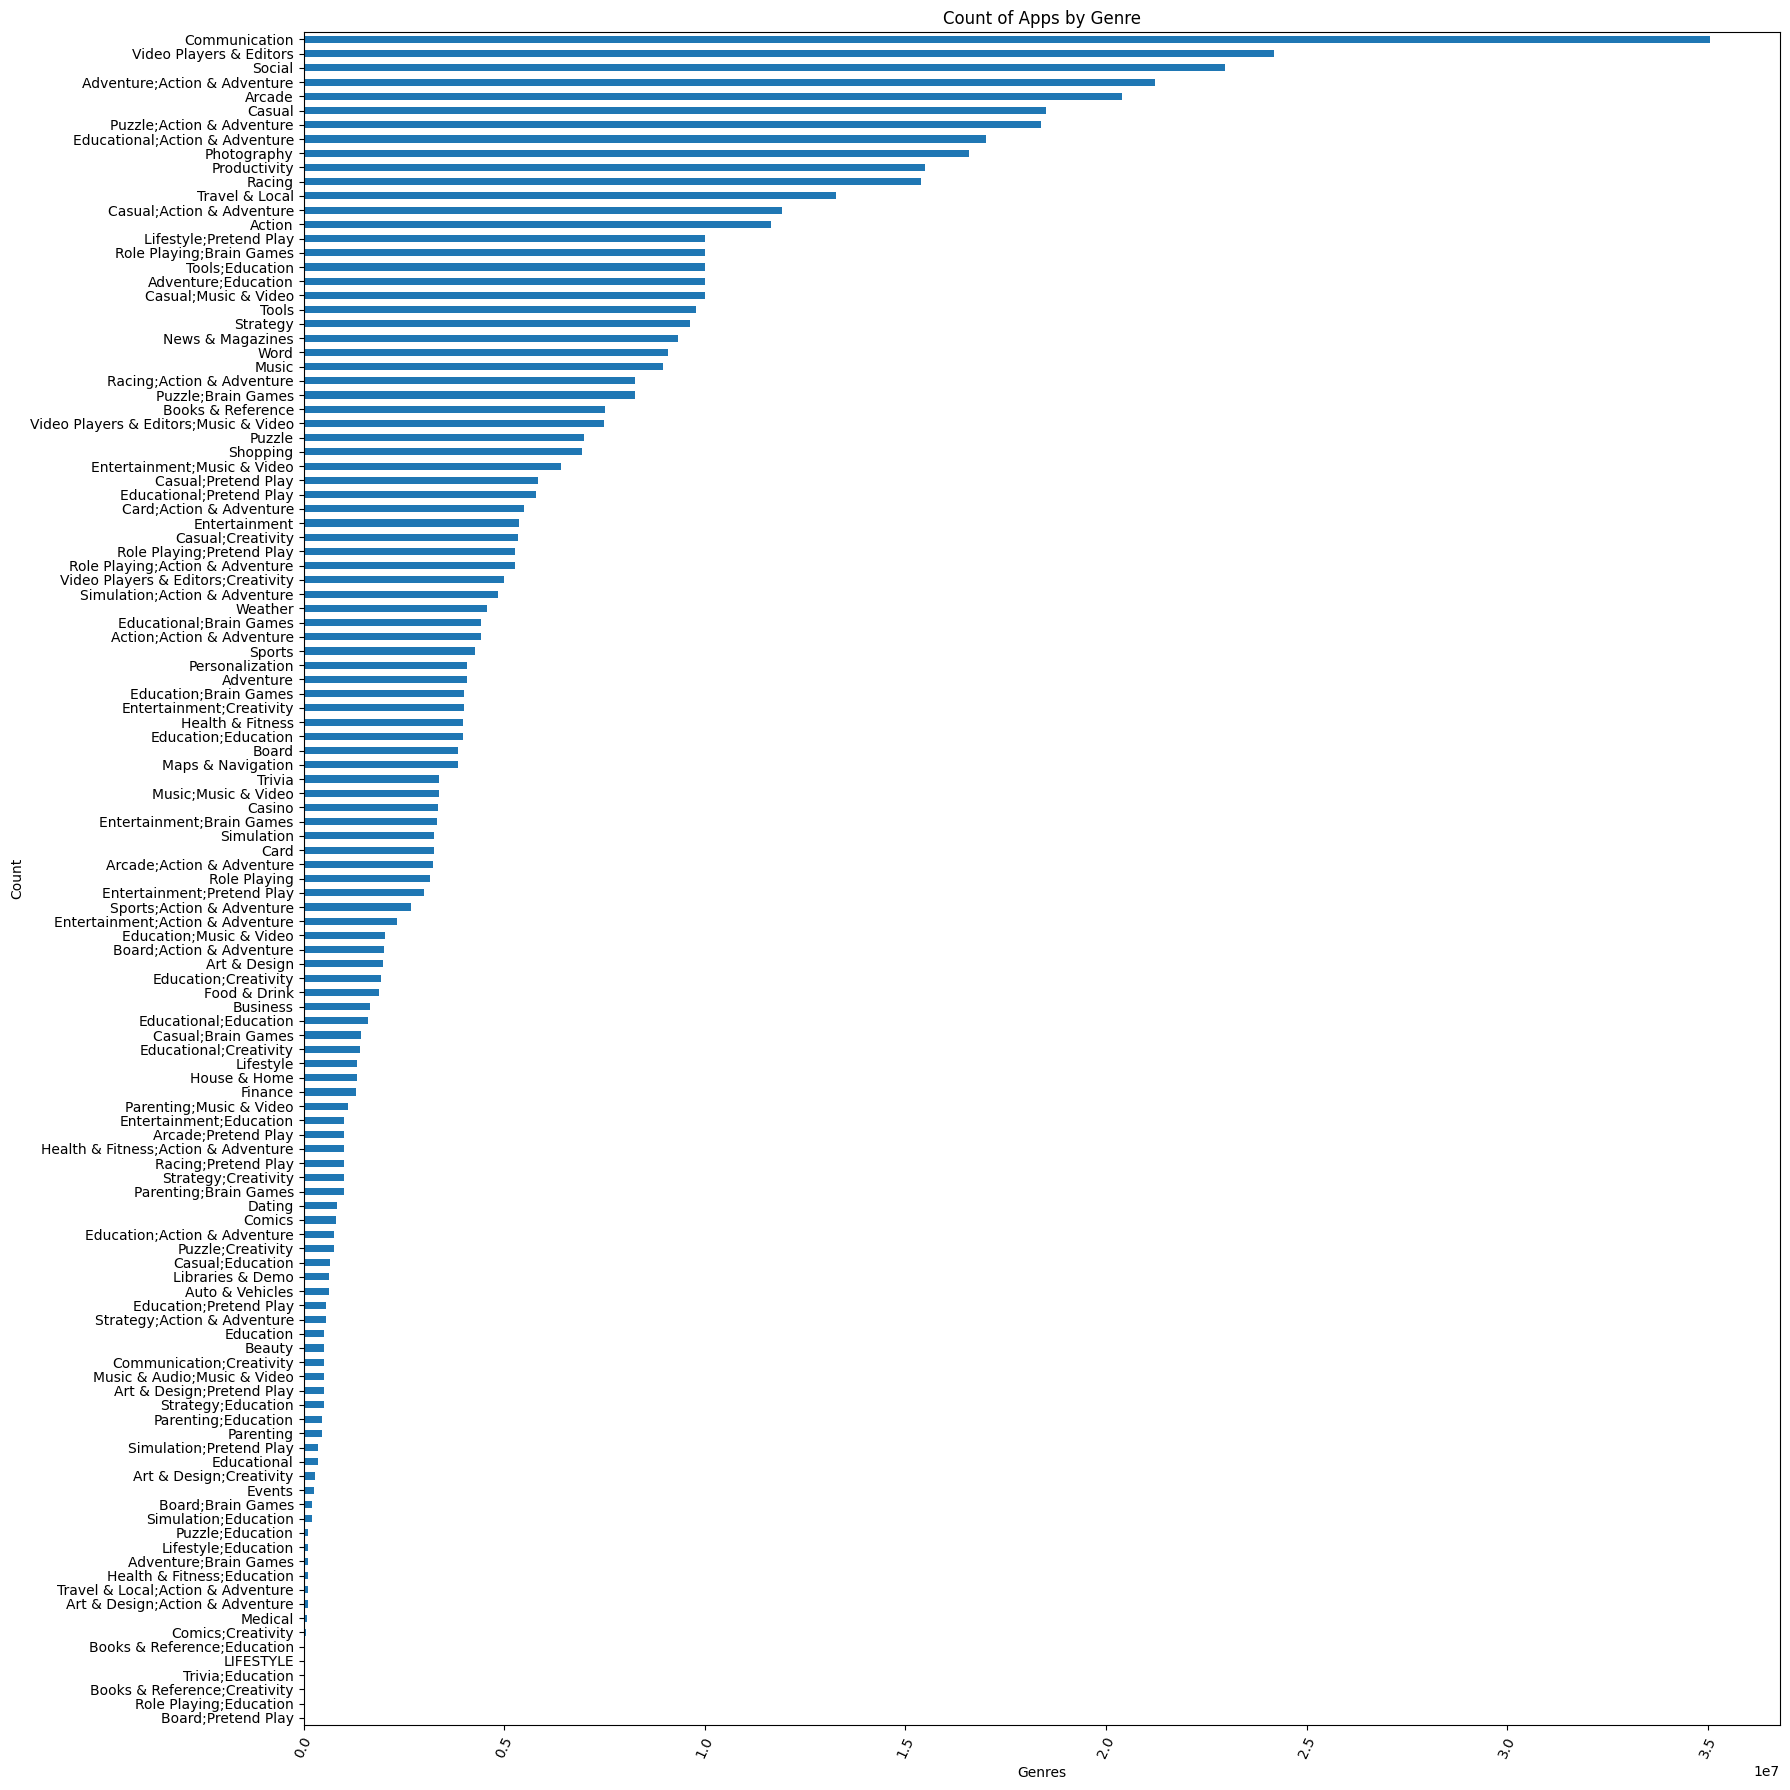

In [59]:
plt.figure(figsize=(18, 18))
apps.groupby('Genres')["Installs"].mean().sort_values().plot(kind="barh")
plt.xticks(rotation=65)
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Count of Apps by Genre')
plt.tight_layout()
plt.show()

These histograms give information about which Genres and Category take the lead in the installing volume. Additionally, they show that the number of paid apps is minority of that in free apps.

### <b><u> Rating</u></b>

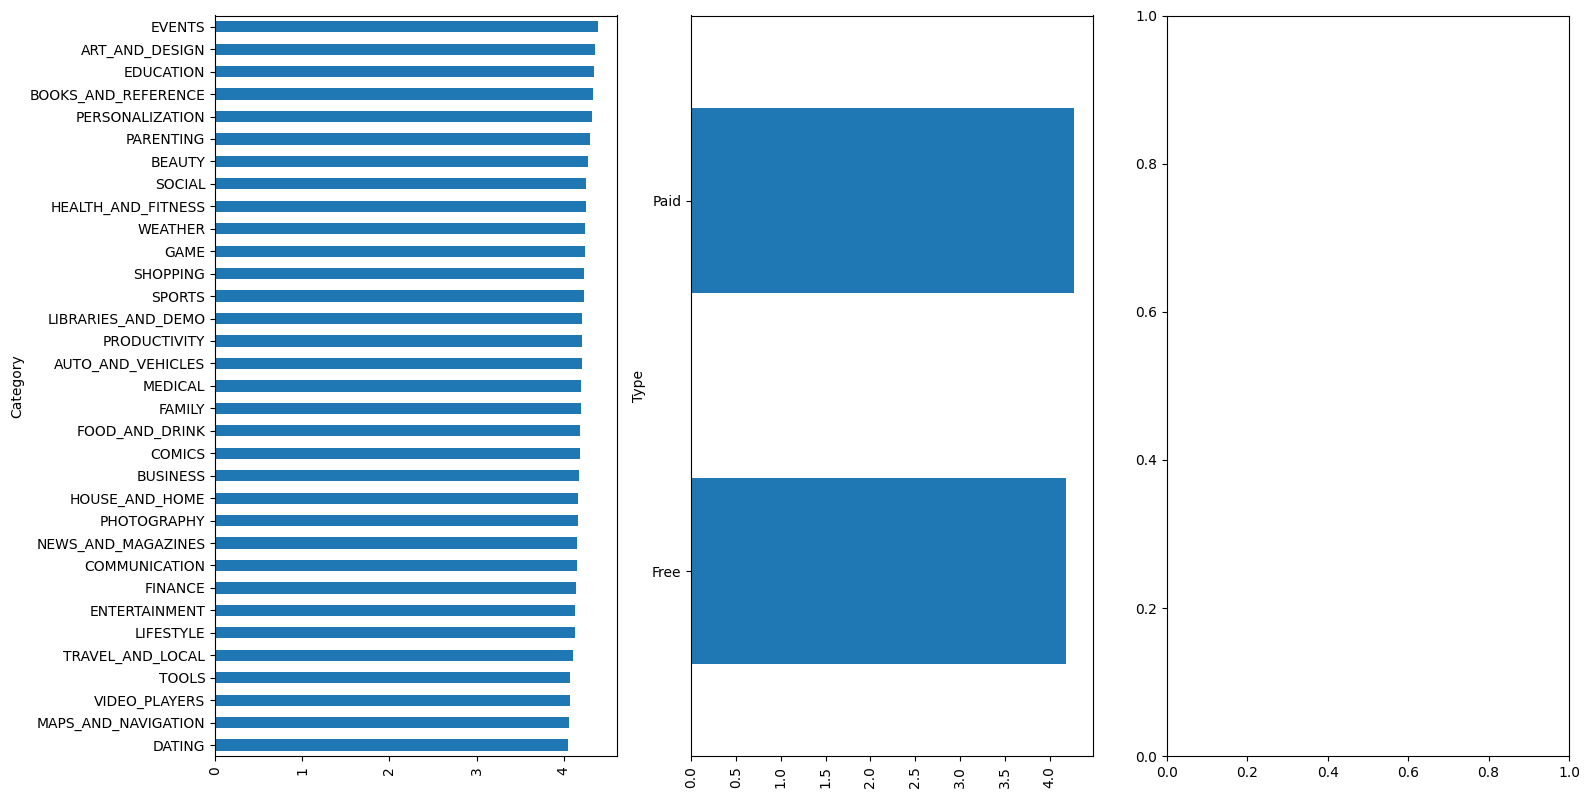

In [60]:
figuresize = (16, 8)
cols = 3
rows = math.ceil(len(categorical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(categorical_columns)):
    plt.subplot(rows, cols, i)
    apps.groupby(categorical_columns[i-1])["Rating"].mean().sort_values().plot(kind="barh")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

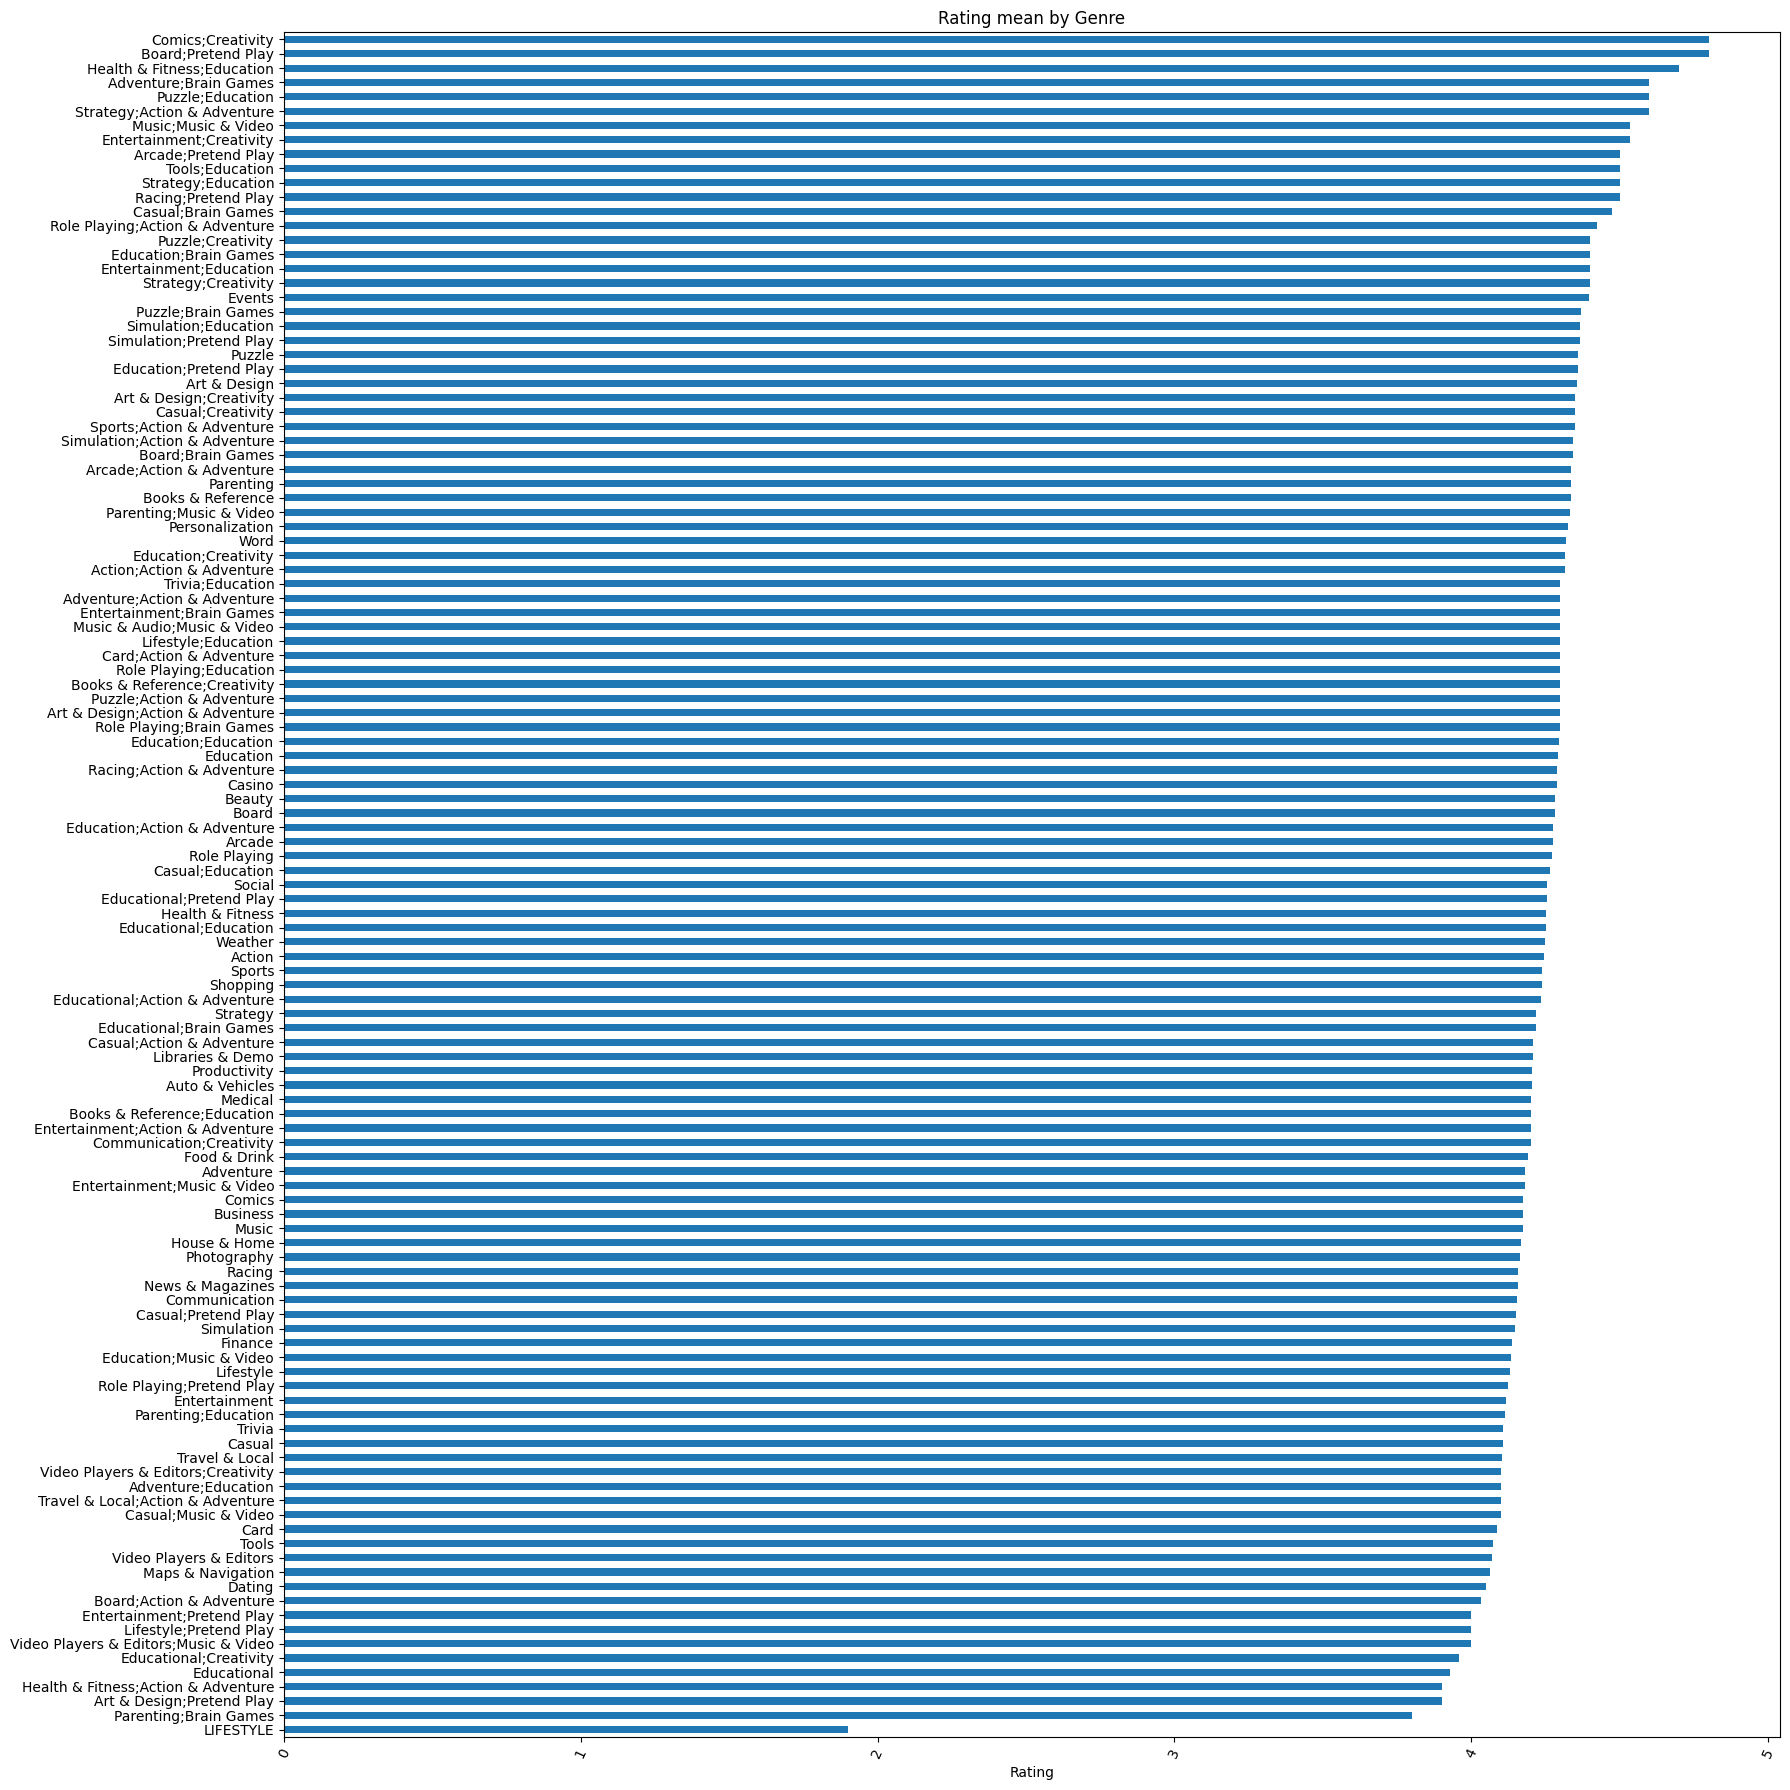

In [61]:
plt.figure(figsize=(18, 18))
apps.groupby('Genres')["Rating"].mean().sort_values().plot(kind="barh")
plt.xticks(rotation=65)
plt.xlabel('Rating')
plt.ylabel('')
plt.title('Rating mean by Genre')
plt.tight_layout()
plt.show()

These histograms express that there are similarity between categories, genres and types. Their rating fluctuate around well above 4 and justunder 4. 
It means Rating object is not affected by categories, genres and types.

### <b><u>3. Numerical feature</u></b>


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

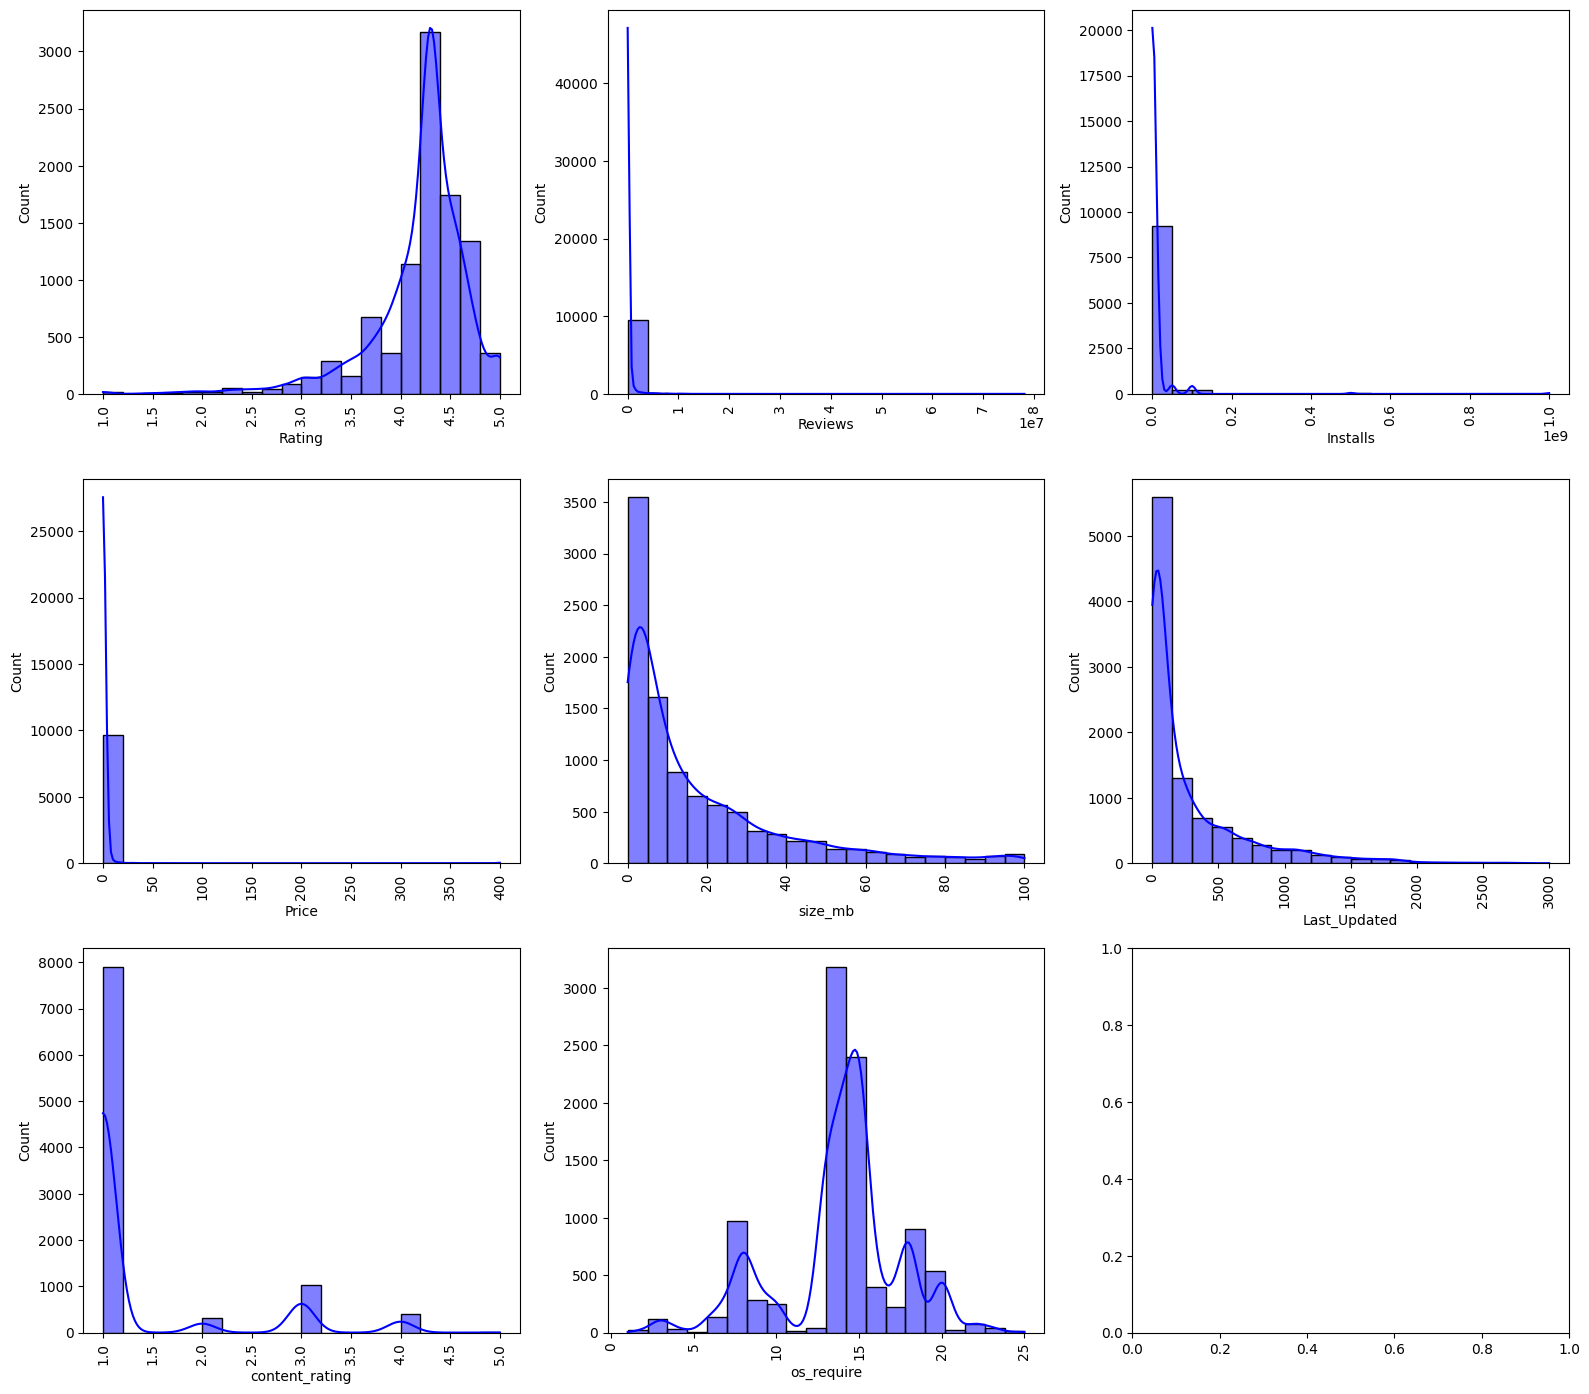

In [62]:
figuresize = (16, 14)
cols = 3
rows = math.ceil(len(numerical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(numerical_columns) + 1):
    plt.subplot(rows, cols, i)
    sns.histplot(apps[numerical_columns[i-1]], color='blue', edgecolor='black', kde=True, bins=20)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

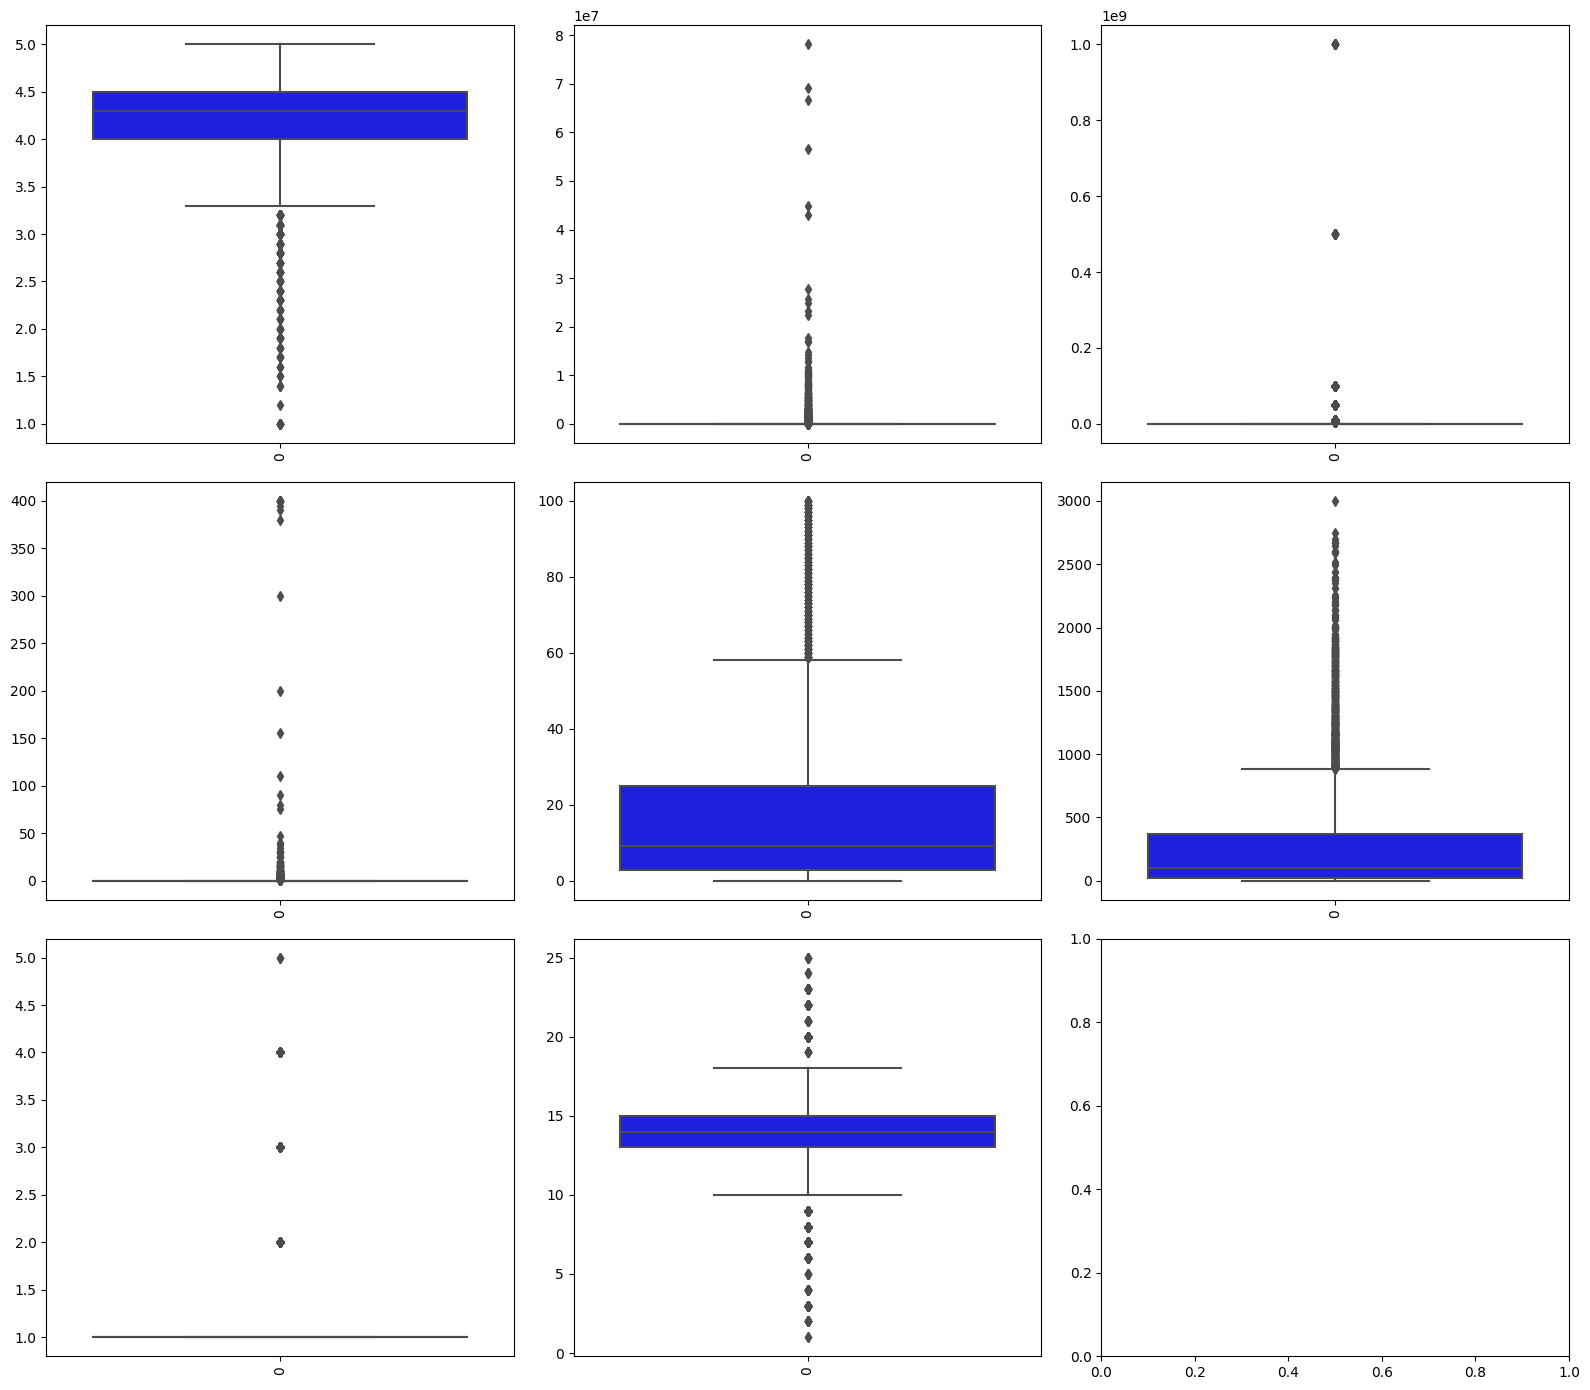

In [63]:
figuresize = (16, 14)
cols = 3
rows = math.ceil(len(numerical_columns) / cols)

plt.subplots(rows, cols, figsize=figuresize)
for i in range(1, len(numerical_columns) + 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(apps[numerical_columns[i-1]], color='blue')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [64]:
apps[numerical_columns].describe()

,Rating,Reviews,Installs,Price,size_mb,Last_Updated,content_rating,os_require
count,9660.000000,9.660000e+03,9.660000e+03,9660.000000,9660.000000,9660.000000,9660.000000,9660.000000
mean,4.192226,2.167817e+05,7.797363e+06,1.097117,17.930691,281.000828,1.371118,13.884058
std,0.496578,1.831337e+06,5.376700e+07,16.850750,21.392569,406.702048,0.834134,3.681436
min,1.000000,0.000000e+00,0.000000e+00,0.000000,0.008500,0.000000,1.000000,1.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000,2.900000,22.000000,1.000000,13.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000,9.100000,96.000000,1.000000,14.000000
75%,4.500000,2.944925e+04,1.000000e+06,0.000000,25.000000,366.000000,1.000000,15.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000,100.000000,3001.000000,5.000000,25.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

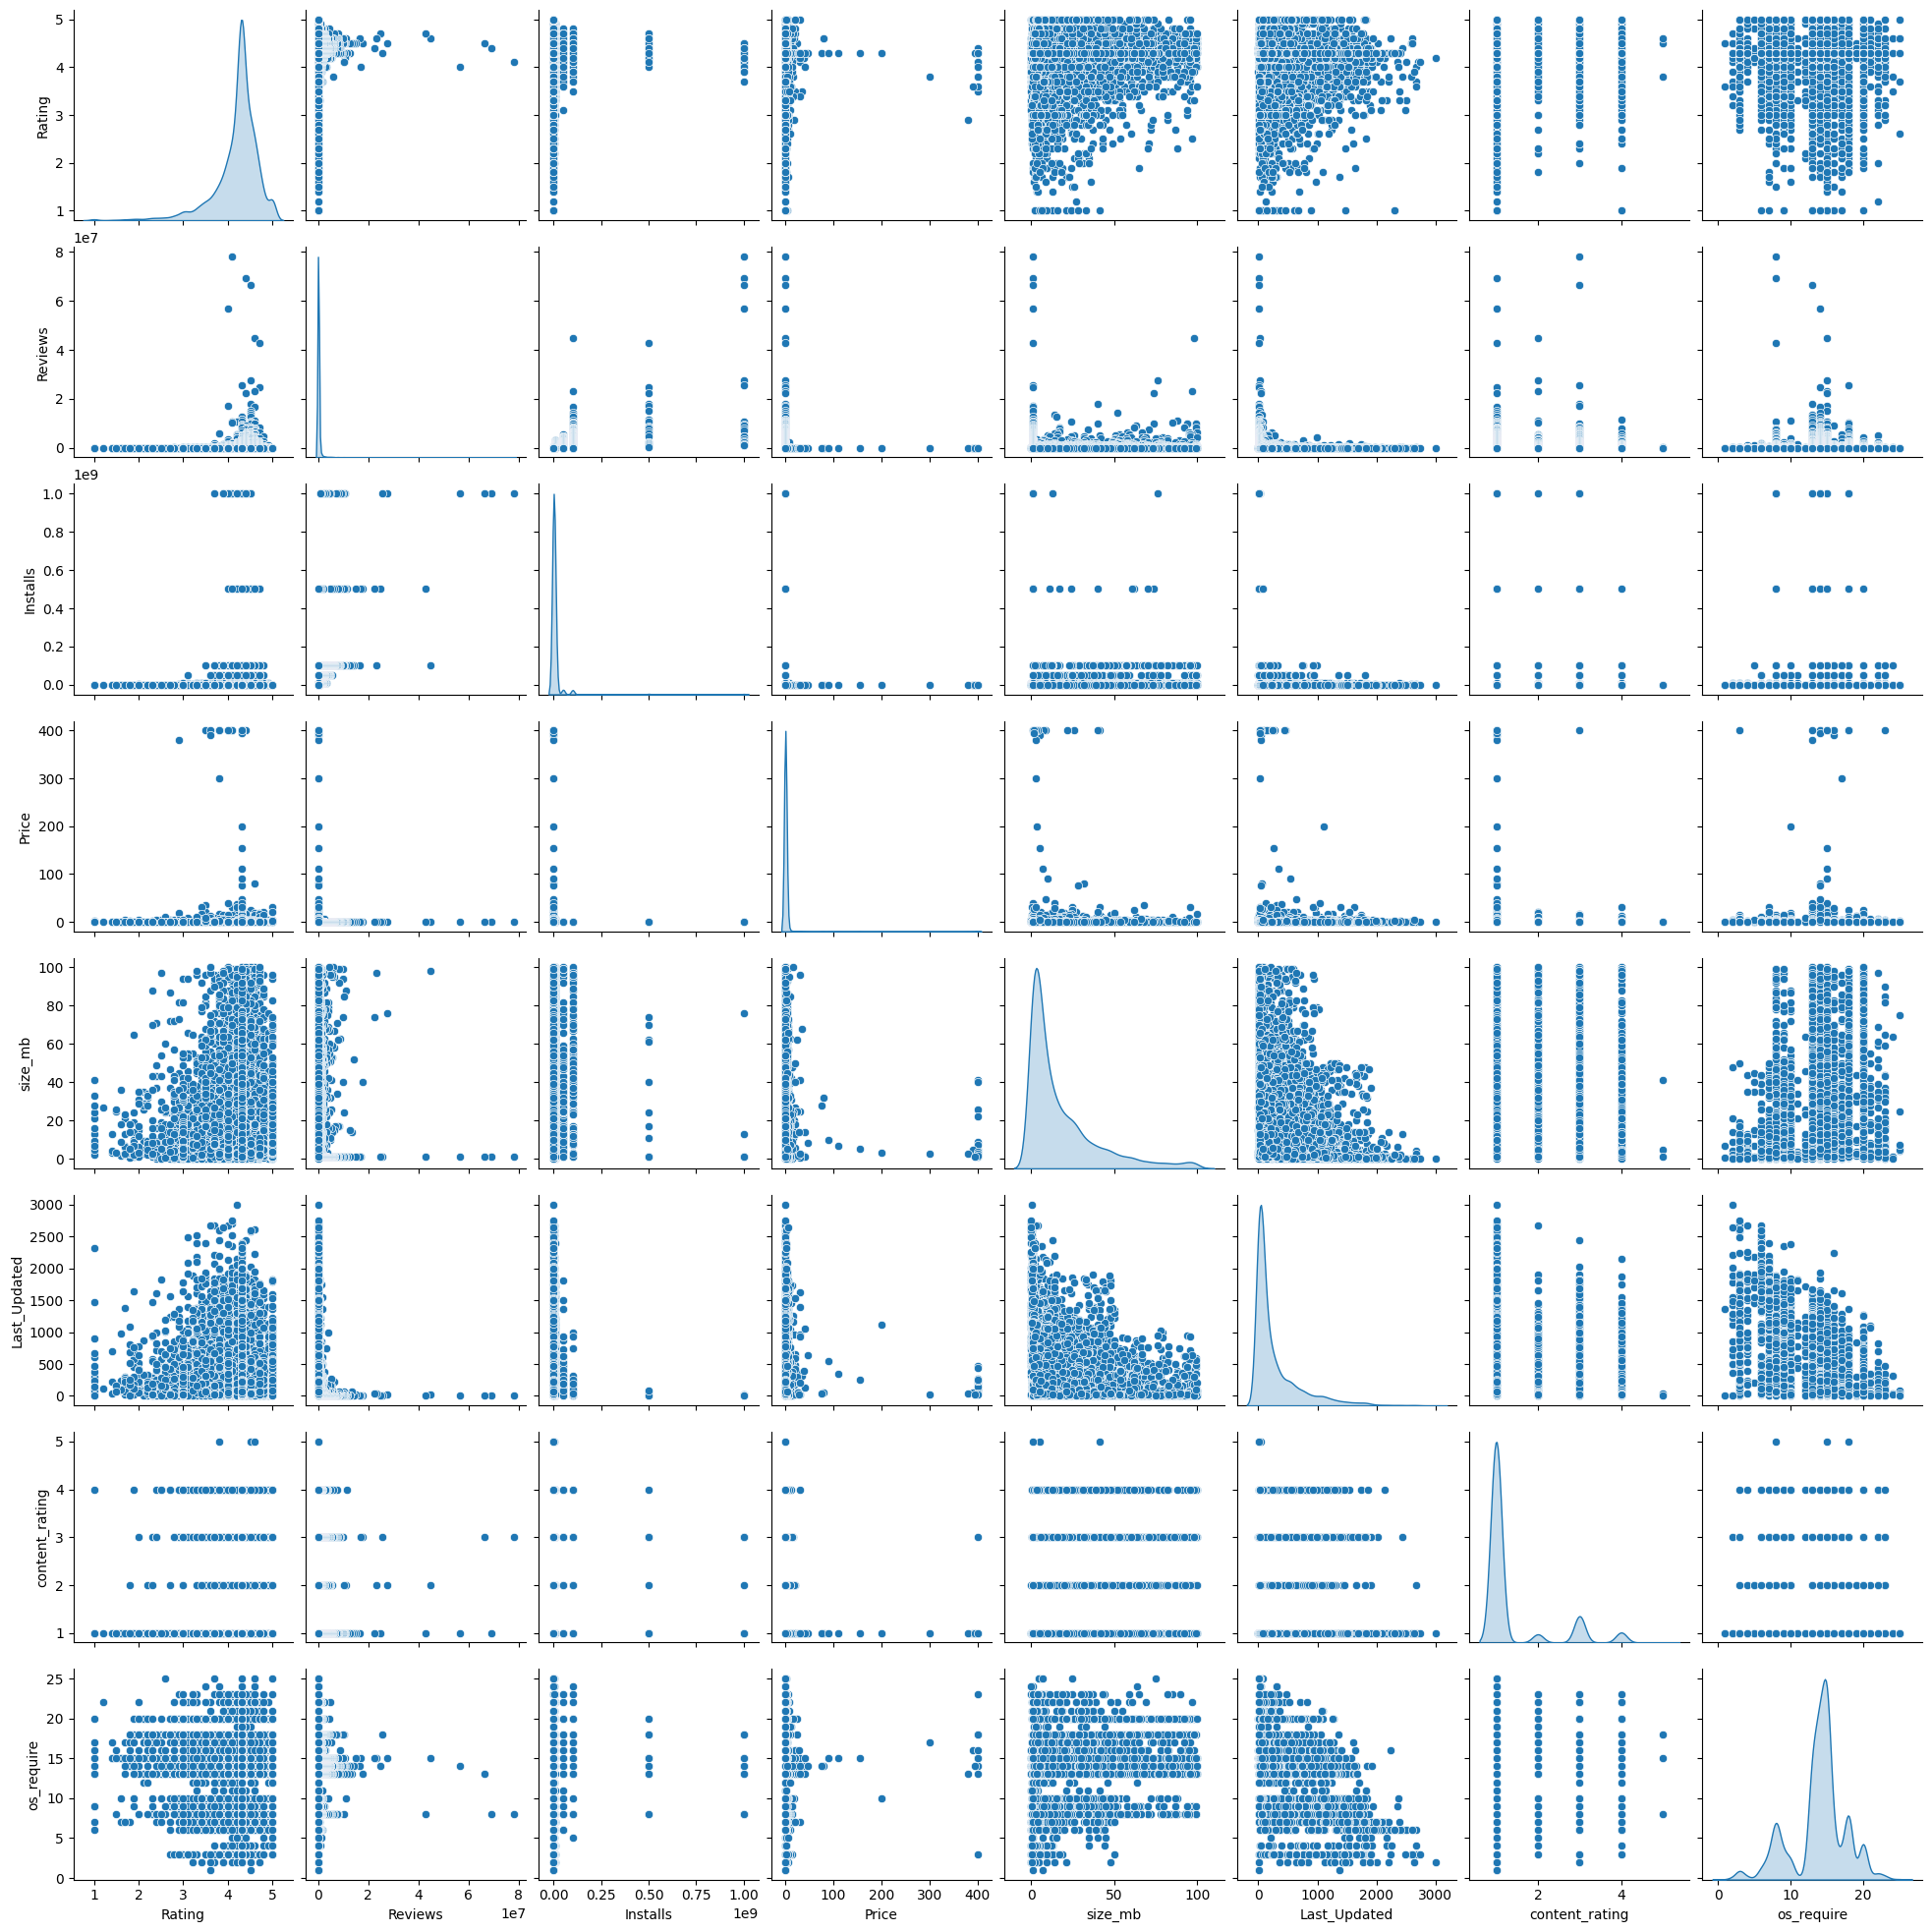

In [65]:
# pairplot
sns.pairplot(apps[numerical_columns], diag_kind="kde", )
plt.show()

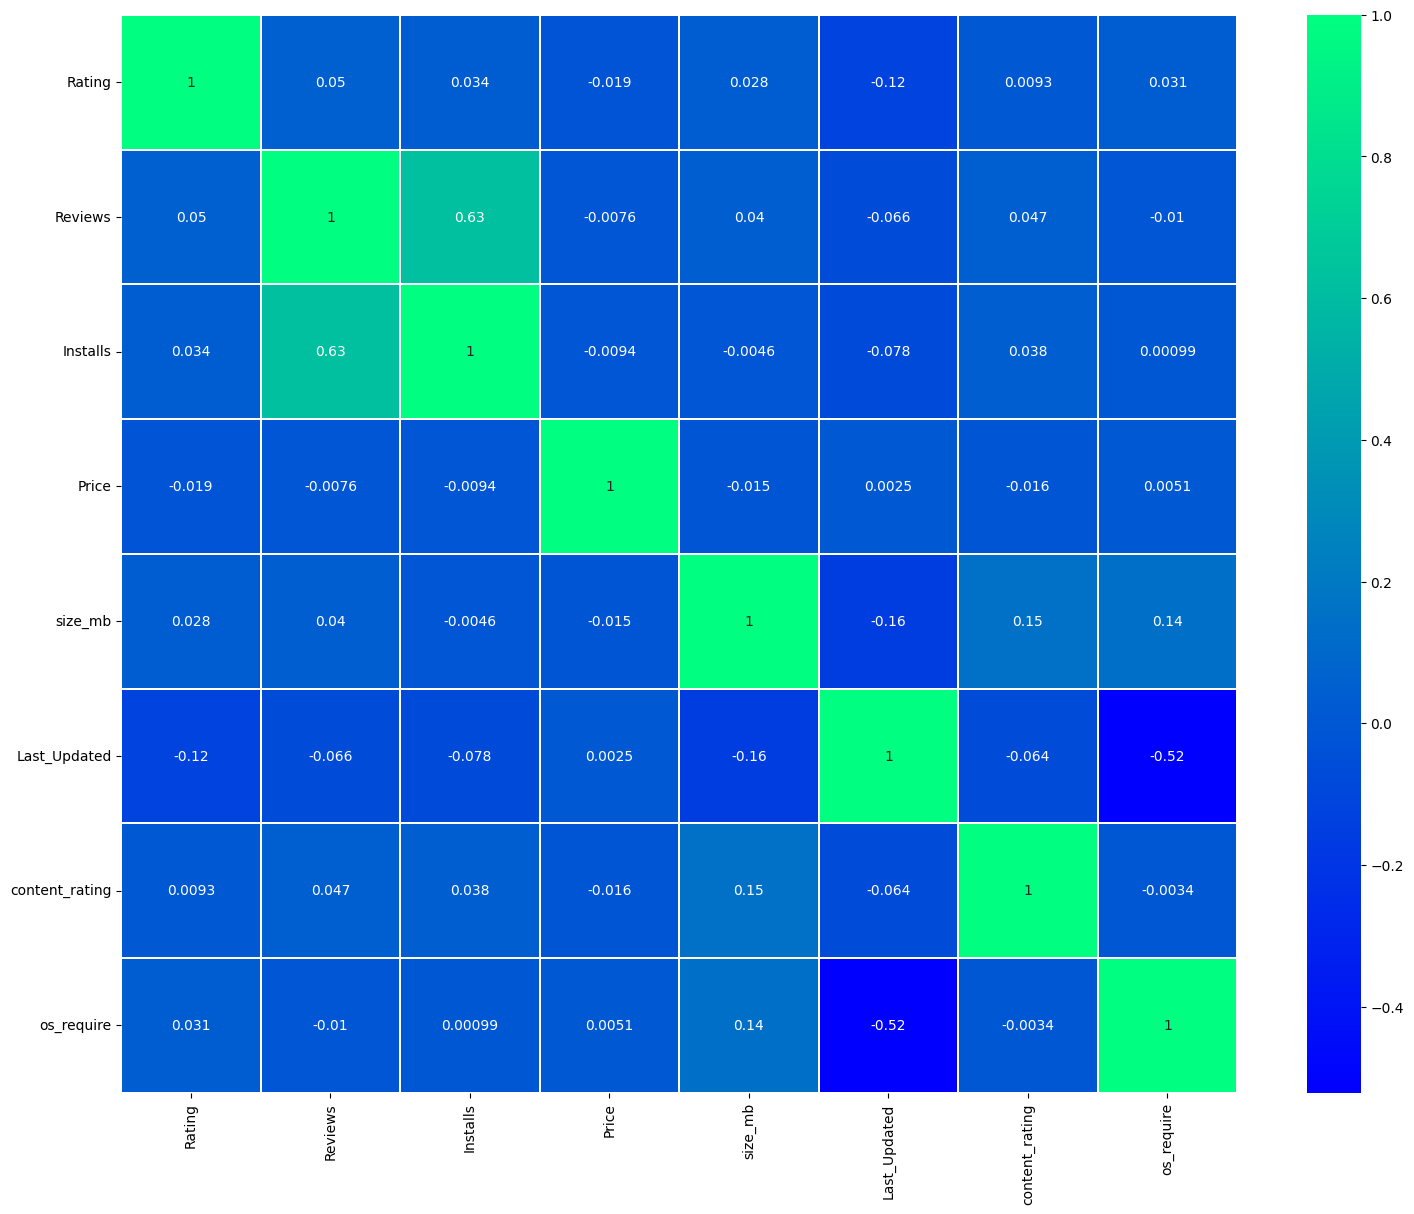

In [66]:
sns.heatmap(apps[numerical_columns].corr(), annot=True, cmap="winter", linewidths=0.2)
plt.gcf().set_size_inches(18, 14)

plt.show()

Regarding the data distribution, the findings were gathered by these above graphs, include:

Most numerical features has been skewed, exception is 'os_require', but it also has had numerous wicks at both upper and lower.

'Rating' has been right skewed with the long upper wick.

'Last Updated' and 'size_mb' have been skewed right with the lower wicks upto respectly 3.000 apps and 100 apps.

Others are skewed left totally at the beginings and just show the wicks.

In conclusion, the result of this analysis could be bias due to the skewed. 


In terms of the correlation between objects and variables, these graphs show that there correlational effects between objects and variables. 

However, to give the excellent decision, this analysis need more evidences to verify the thesis.

Altogether, the initial technical specifications which have the correlational effects with objects, are size_mb, os_require and content rating.

They are variable to predict objects.

## <b><u>Which initial technical specifications afftect to favor (rating) and popularity (installing)? </u></b>
The solution for this request is using Classification tools of Machine Learning.

The research objects tested in this model are binary data, only two values (1 and 0).

So, 'Rating' and 'Installs' will be converted to binary data with condition and value below:

Object 1: y1 = apps.favored :

    If rating score > percentile 75% of rating score:  
        apps.favored = 1
    Else: apps.favored = 0 

Object 2: y2 = apps.used :

    If installs > percentile 75% installs:
        apps.used = 1
    Else: apps.used =0


In [67]:
apps['favored']=apps['Rating']
percentile_75=apps['favored'].quantile(0.75)
apps['favored'] = (apps['favored'] > percentile_75).astype(int)
print(percentile_75)

4.5


In [68]:
apps['used']=apps['Installs']
percentile_75=apps['used'].quantile(0.75)
apps['used'] = (apps['used'] > percentile_75).astype(int)
print(percentile_75)

1000000.0


In [69]:
# Creates objects and variables
y1=apps['favored']#binary data
y2=apps['used']#binary data
x=apps[['size_mb', 'os_require', 'content_rating']]#count data,ordinal data, ratio data

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [71]:
x=apps[['size_mb']]

In [72]:
from sklearn.linear_model import LogisticRegression

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)
x_train, x_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình Logistic Regression cho y1
model_y1 = LogisticRegression()
model_y1.fit(x_train, y1_train)

# Dự đoán và đánh giá mô hình cho y1
y1_pred = model_y1.predict(x_test)
accuracy_y1 = accuracy_score(y1_test, y1_pred)
print("Accuracy for y1:", accuracy_y1)
print("Classification Report for y1:")
print(classification_report(y1_test, y1_pred))

# Xây dựng và huấn luyện mô hình Logistic Regression cho y2
model_y2 = LogisticRegression()
model_y2.fit(x_train, y2_train)

# Dự đoán và đánh giá mô hình cho y2
y2_pred = model_y2.predict(x_test)
accuracy_y2 = accuracy_score(y2_test, y2_pred)
print("\nAccuracy for y2:", accuracy_y2)
print("Classification Report for y2:")
print(classification_report(y2_test, y2_pred))

Accuracy for y1: 0.8359213250517599
Classification Report for y1:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.00      0.00      0.00       317

    accuracy                           0.84      1932
   macro avg       0.42      0.50      0.46      1932
weighted avg       0.70      0.84      0.76      1932


Accuracy for y2: 0.7893374741200828
Classification Report for y2:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1525
           1       0.00      0.00      0.00       407

    accuracy                           0.79      1932
   macro avg       0.39      0.50      0.44      1932
weighted avg       0.62      0.79      0.70      1932



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif

In [73]:
from sklearn.tree import DecisionTreeClassifier

# Split the data for each target variable
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier for y1
clf_y1 = DecisionTreeClassifier()
# Train the classifier for y1
clf_y1.fit(x_train, y1_train)
# Make predictions for y1
y1_pred = clf_y1.predict(x_test)
# Calculate accuracy for y1
accuracy_y1 = accuracy_score(y1_test, y1_pred)
print("Accuracy for y1:", accuracy_y1)
print("Classification Report for y1:")
print(classification_report(y1_test, y1_pred))

# Initialize the DecisionTreeClassifier for y2
clf_y2 = DecisionTreeClassifier()
# Train the classifier for y2
clf_y2.fit(x_train, y2_train)
# Make predictions for y2
y2_pred = clf_y2.predict(x_test)
# Calculate accuracy for y2
accuracy_y2 = accuracy_score(y2_test, y2_pred)
print("Accuracy for y2:", accuracy_y2)
print("Classification Report for y2:")
print(classification_report(y2_test, y2_pred))

Accuracy for y1: 0.8338509316770186
Classification Report for y1:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1615
           1       0.00      0.00      0.00       317

    accuracy                           0.83      1932
   macro avg       0.42      0.50      0.45      1932
weighted avg       0.70      0.83      0.76      1932

Accuracy for y2: 0.8022774327122153
Classification Report for y2:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1525
           1       0.55      0.37      0.44       407

    accuracy                           0.80      1932
   macro avg       0.70      0.64      0.66      1932
weighted avg       0.78      0.80      0.79      1932



After applying Machine Learning to classify objects, the evaluation indicators revealed data imbalance or insufficient data samples.

However, they are also showing a few positive consequence.

In terms of y1 (favored), the model has the moderate accuracy score (approx 84%-logistic regression and 72%-decision tree classifier) when it predicts the negative value (0). However, the prediction of the positive value (1) attains the low accuracy due to the low percentage of testing results. In Logistic Regression model, the accurate score of the positive value in 'favored' is 0%, and the figure in Decision Tree Classifier is approx 20%. 

The contrast was seen in that in y2 (used), the accuracy scores reach the top for the positive value (1), are approx 99% for both two methods. Reversely, the accurate score for the negative value (0) is very low, it points out the model predicting efficiently the positive value of the used.

Overall, the inital technical specifications are able to decrease rating score and increase installing volume.

## <b><u>How initial technical specifications afftect to favor (rating) and popularity (installing)? </u></b>


Regression models of Machine Learning are able to train and test this data to predict the result for the request.

The objects and variables of these models are numerical data, includes ordinal and count.

In [74]:
# Assigns value for objective variables
y1= apps['Rating']
y2= apps['Installs']

In [75]:
from sklearn.ensemble import RandomForestRegressor

# Split the data for each target variable
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor for y1
reg_y1 = RandomForestRegressor()
# Train the regressor for y1
reg_y1.fit(x_train, y1_train)
# Make predictions for y1
y1_pred = reg_y1.predict(x_test)

# Initialize the Random Forest Regressor for y2
reg_y2 = RandomForestRegressor()
# Train the regressor for y2
reg_y2.fit(x_train, y2_train)
# Make predictions for y2
y2_pred = reg_y2.predict(x_test)

# You can calculate metrics or perform analysis on the predictions here

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae_y1 = mean_absolute_error(y1_test, y1_pred)
print("Mean Absolute Error for y1:", mae_y1)

# Calculate Mean Squared Error (MSE)
mse_y1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error for y1:", mse_y1)

# Calculate R-squared (R^2) score
r2_y1 = r2_score(y1_test, y1_pred)
print("R-squared (R^2) score for y1:", r2_y1)

mae_y2 = mean_absolute_error(y2_test, y2_pred)
print("Mean Absolute Error for y2:", mae_y2)


mse_y2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error for y2:", mse_y2)

r2_y2 = r2_score(y2_test, y2_pred)
print("R-squared (R^2) score for y2:", r2_y2)

Mean Absolute Error for y1: 0.34752167180085014
Mean Squared Error for y1: 0.26124226963671954
R-squared (R^2) score for y1: -0.024037057273474494
Mean Absolute Error for y2: 13301288.580667822
Mean Squared Error for y2: 4132119939817999.0
R-squared (R^2) score for y2: 0.04178179073656996


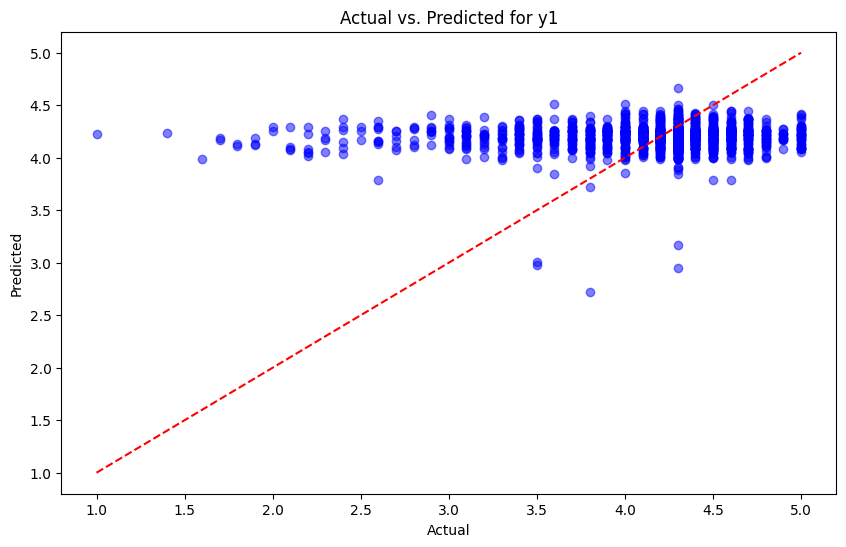

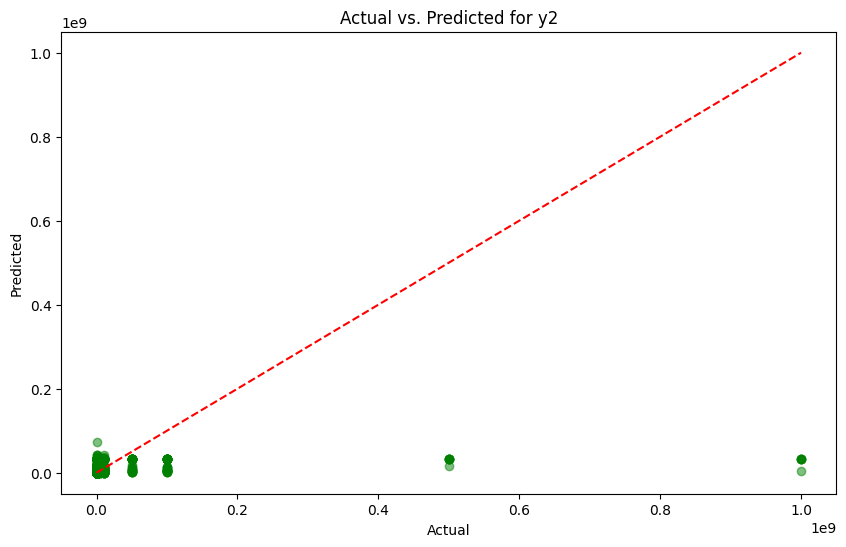

In [77]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for y1
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, color='blue', alpha=0.5)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y1')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot actual vs. predicted values for y2
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='green', alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [78]:
from sklearn.svm import SVR

# Split the data for each target variable
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

# Initialize the SVM regressor for y1
reg_y1 = SVR()
# Train the regressor for y1
reg_y1.fit(x_train, y1_train)
# Make predictions for y1
y1_pred = reg_y1.predict(x_test)

# Initialize the SVM regressor for y2
reg_y2 = SVR()
# Train the regressor for y2
reg_y2.fit(x_train, y2_train)
# Make predictions for y2
y2_pred = reg_y2.predict(x_test)

In [79]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae_y1 = mean_absolute_error(y1_test, y1_pred)
print("Mean Absolute Error for y1:", mae_y1)

# Calculate Mean Squared Error (MSE)
mse_y1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error for y1:", mse_y1)

# Calculate R-squared (R^2) score
r2_y1 = r2_score(y1_test, y1_pred)
print("R-squared (R^2) score for y1:", r2_y1)

mae_y2 = mean_absolute_error(y2_test, y2_pred)
print("Mean Absolute Error for y2:", mae_y2)


mse_y2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error for y2:", mse_y2)

r2_y2 = r2_score(y2_test, y2_pred)
print("R-squared (R^2) score for y2:", r2_y2)

Mean Absolute Error for y1: 0.3219671568967419
Mean Squared Error for y1: 0.27093840070031594
R-squared (R^2) score for y1: -0.06204467960469451
Mean Absolute Error for y2: 9664039.628037333
Mean Squared Error for y2: 4404094009297802.5
R-squared (R^2) score for y2: -0.02128765294334989


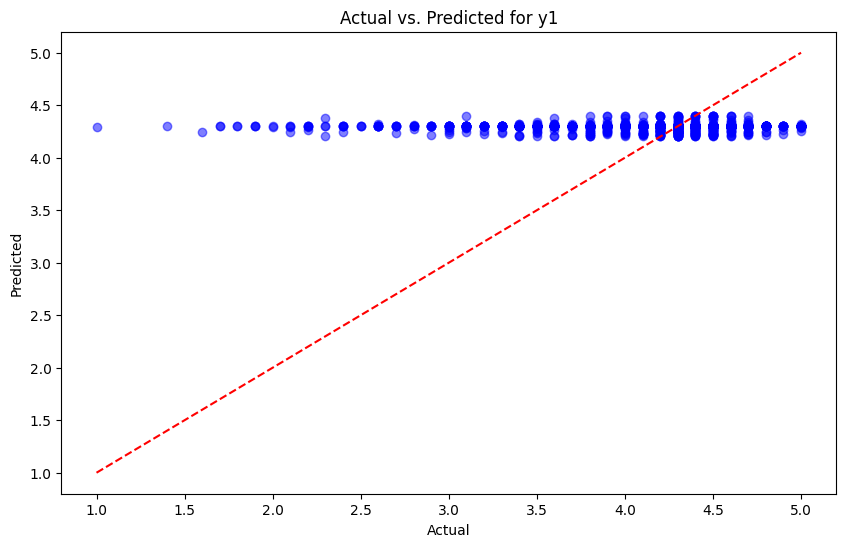

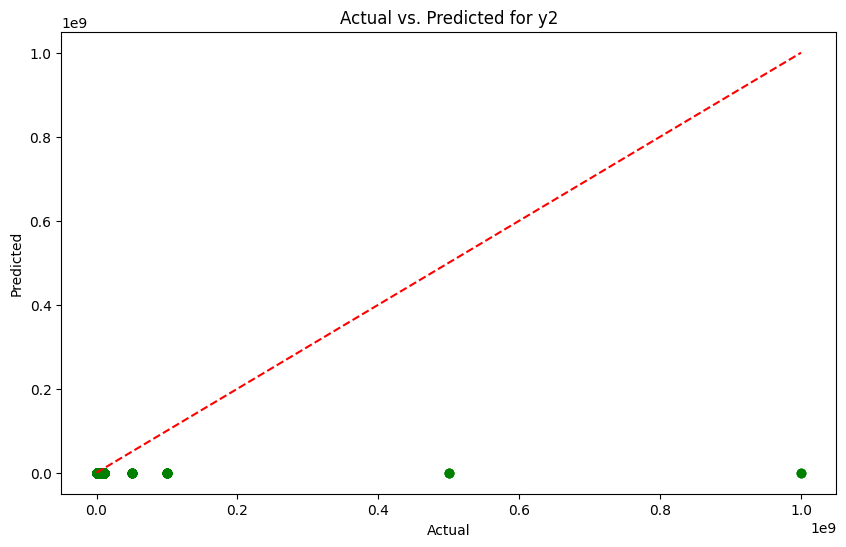

In [80]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for y1
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, color='blue', alpha=0.5)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y1')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot actual vs. predicted values for y2
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='green', alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [81]:
from sklearn.linear_model import LinearRegression

# Split the data for each target variable
x_train, x_test, y1_train, y1_test = train_test_split(x, y1, test_size=0.2, random_state=42)
_, _, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

# Initialize the Linear Regression model for y1
reg_y1 = LinearRegression()
# Train the model for y1
reg_y1.fit(x_train, y1_train)
# Make predictions for y1
y1_pred = reg_y1.predict(x_test)

# Initialize the Linear Regression model for y2
reg_y2 = LinearRegression()
# Train the model for y2
reg_y2.fit(x_train, y2_train)
# Make predictions for y2
y2_pred = reg_y2.predict(x_test)

In [82]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate Mean Absolute Error (MAE)
mae_y1 = mean_absolute_error(y1_test, y1_pred)
print("Mean Absolute Error for y1:", mae_y1)

# Calculate Mean Squared Error (MSE)
mse_y1 = mean_squared_error(y1_test, y1_pred)
print("Mean Squared Error for y1:", mse_y1)

# Calculate R-squared (R^2) score
r2_y1 = r2_score(y1_test, y1_pred)
print("R-squared (R^2) score for y1:", r2_y1)

mae_y2 = mean_absolute_error(y2_test, y2_pred)
print("Mean Absolute Error for y2:", mae_y2)


mse_y2 = mean_squared_error(y2_test, y2_pred)
print("Mean Squared Error for y2:", mse_y2)

r2_y2 = r2_score(y2_test, y2_pred)
print("R-squared (R^2) score for y2:", r2_y2)

Mean Absolute Error for y1: 0.33978154226764345
Mean Squared Error for y1: 0.2563594311721574
R-squared (R^2) score for y1: -0.004896940555972451
Mean Absolute Error for y2: 13839680.961688051
Mean Squared Error for y2: 4318582716728128.0
R-squared (R^2) score for y2: -0.0014580064589055919


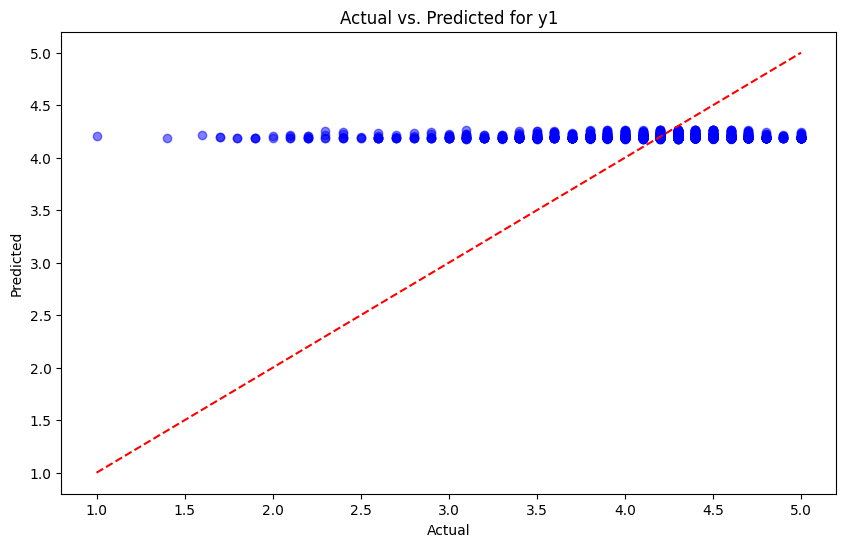

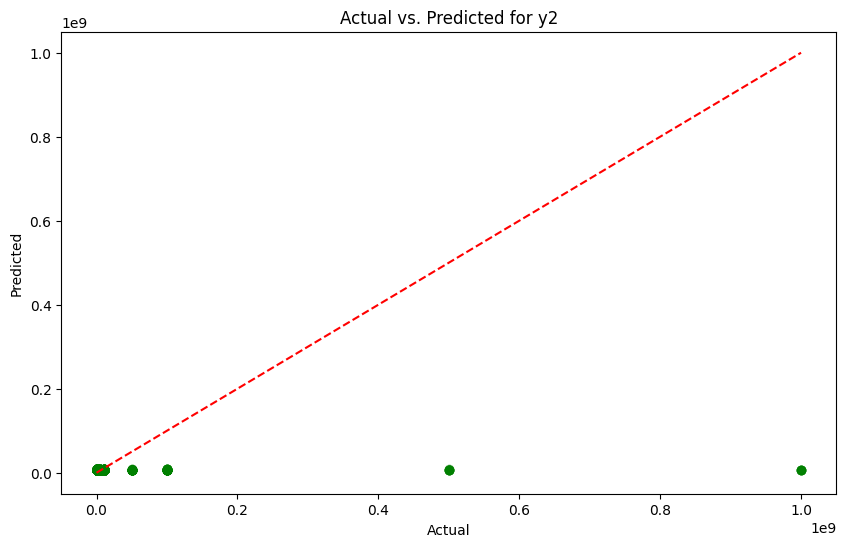

In [83]:
import matplotlib.pyplot as plt

# Plot actual vs. predicted values for y1
plt.figure(figsize=(10, 6))
plt.scatter(y1_test, y1_pred, color='blue', alpha=0.5)
plt.plot([min(y1_test), max(y1_test)], [min(y1_test), max(y1_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y1')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# Plot actual vs. predicted values for y2
plt.figure(figsize=(10, 6))
plt.scatter(y2_test, y2_pred, color='green', alpha=0.5)
plt.plot([min(y2_test), max(y2_test)], [min(y2_test), max(y2_test)], color='red', linestyle='--')
plt.title('Actual vs. Predicted for y2')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

the models seem to perform poorly, with low R-squared scores and relatively high errors. Further analysis and potentially model improvement may be needed.

## <b><u>Conclusion:</u></b>



In terms of the accurace of this research through applying Machine Learning's models, the testing results show the high imbalance in the input data. 

The percentile of models are skewed far away from their median. conseequently, the results of analysis models wich were used to predict the objects, are totally biased towards one side. 

The insight gained from this analysis is there are correlational effects betwween them, however, it just expresses that effect for one dimension of the vector.

Particulartly, toward favorability object (Rating), It is quitely correct that the high initial technical indicators bring the high favored, but when decrease the initial technical indicators. 

The object tend to go out the gap of a correct result. The contrast was witnessed in the model of the popularity (Installs).

To improve the accuracy of this research, the reseach object should be mined deeper in each categorical features. 

Moreover, applying techniques which assist handling imbalanced data, need to be implemented such as resampling or collecting real data, etc.